# ***Capstone Completion EDA - Swire Coca Cola Forecasting***

## ***Table Of Contents***


><a href="#1">Introduction: Business Problem Statement</a>

><a href="#2">Importing Libraries</a>

><a href="#3">Import Dataset</a>

><a href="#4">Understanding the data</a>

><a href="#5">General Exploration of the dataset</a>

>><a href="#5.1">Q1. What is the trend in demand for top 10 products over time?</a>

>><a href="#5.2">Q2. What is the relation between UNIT SALES and DOLLAR SALES?</a>

>><a href="#5.3">Q3. What is the week-over-week percentage change in unit sales for the products?</a>

><a href="#6">Manufacture Data Analysis</a>

>><a href="#6.1">Understanding the Manufacture data</a>

>><a href="#6.3">Q2. What is the 'Swire-cc' market size?</a>

>><a href="#6.4">Q3. What is the market size of Caloric Segments 'DIET/LIGHT' and 'REGULAR' in 'SWIRE-CC'?</a>

>><a href="#6.5">Q4. What is the market size of different categories in 'Swire-cc' and diet caloric segment?</a>

>><a href="#6.6">Q5. What is the market size of 'SSD' and 'ING ENHANCED WATER' categories in 'SWIRE-CC' manufacturer and 'REGULAR' caloric segment?</a>

><a href="#7">Category Data Analysis</a>

>><a href="#7.1">Q1. What are the Unit/Dollar Sales for Category over time?</a>

>><a href="#7.2">Q2. How can we understand the diversity of Category by Brand?</a>

>><a href="#7.3">Q3. What is the overall demand in Diet Category over time?</a>

>><a href="#7.4">Q4. What is the overall demand in Diet Category for 'Swire' manufacturer over time with calorie and also brand analysis?</a>

><a href="#8">Caloric Segment Analysis</a>

>><a href="#8.1">Q1. What is the distribution of dollar sales and unit sales of Caloric Segment per Year?</a>

>><a href="#8.2">Q2. What is the distribution of Caloric Segment over Region Demographics?</a>

><a href="#9">Package Type Data Analysis</a>

>><a href="#9.1">Q1. What is the distribution of Package Type over Category?</a>

>><a href="#9.2">Q2. What are the Unit Sales over Time?</a>

><a href="#10">Flavor Analysis</a>

>><a href="#10.1">Q1. How to know the frequency of each word in different flavored type?</a>

>><a href="#10.2">Q2. Calculate month over month sales of each flavored type?</a>

>><a href="#10.3">Q3. What is the distribution of flavor types with different age groups?</a>

><a href="#11">Results</a>

><a href="#12">Team Contribution</a>

><a href="#13">Conclusion</a>

## ***Introduction - Business Problem Statement*** <a name='1'></a>

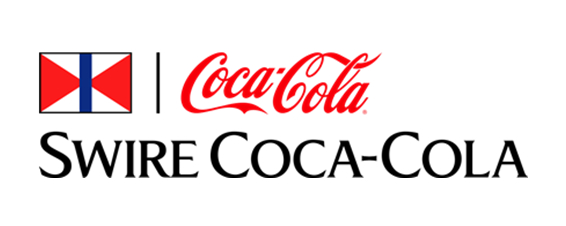

Swire Coca-Cola, USA is responsible for the production, sale, and distribution of Coca-Cola and various beverages across 13 states in the American West. The company is committed to continuously introducing innovative products into the market. Swire aims to enhance its production planning and management specifically for these products. Forecasting the demand for each innovative product listed so that this guarantees efficient resource utilization.

The analytic approach we used for the analysis is:

Identify regular products that closely resemble the specified innovative products and forecast sales by leveraging the sales data of these similar products.
Determine the most relevant similar products based on factors such as brand, market category, manufacturer, package type, and/or flavor, matching the specifications of the specified innovative products.
Analyze the weekly sales figures of these similar products.
Aggregate the sales data of these products to predict the sales of the innovative products.

In this notebook, the analysis provides valuable insights into the sales trends of products across various sub-segments and segment combinations. We analyze mostly on unit sales rather than dollar sale. Our emphasis on unit sales proves beneficial regardless of cost fluctuations.  Additionally, we analyze demographic data alongside product segmentation. The integration of Python, SQL, and Tableau provides a insightful analysis, which further can be used for modeling analysis.

## ***Importing Libraries*** <a name='2'></a>

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

Importing the pandas and numpy libraries for data manipulation and analysis, matplotlib and seaborn for visualizations.

## ***Import Dataset*** <a name='3'></a>

1.   List item
2.   List item



The dataset is in google drive, we need to mount the google drive to google colab.

In [ ]:
# mounting the drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


After mounting the drive to the google colab we need to provide the file path to the file location in the google drive.

In [ ]:
# Path to the data in google drive
file_path1 = '/content/drive/My Drive/Project_Capstone_2/FACT_MARKET_DEMAND.csv'
file_path2 = '/content/drive/My Drive/Project_Capstone_2/consumer_demographics.csv'
file_path3 = '/content/drive/My Drive/Project_Capstone_2/zip_to_market_unit_mapping.csv'

Loading the data into the pandas data frame from the drive and naming the dataframe as market_demand for market demand dataset, consumer_demographics for consumer demographics dataset and zip_market for zip market dataset.
We analyze the zip_market and consumer_demographics data using the SQL and Tableau later.

In [ ]:
# Load data into a Pandas DataFrames
market_demand = pd.read_csv(file_path1)
consumer_demographics = pd.read_csv(file_path2)
zip_market = pd.read_csv(file_path3)

## ***Understanding the data*** <a name='4'></a>

In [ ]:
# Exploring the first five rows of data
market_demand.head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...


Here, we see 10 columns. The **DATE** column represents the sales date, and the **MARKET_KEY** column links the market demand dataset to the demographics dataset. The **UNIT_SALES** and **DOLLAR_SALES** columns represent the sales of products in units and dollars, respectively. Additionally, the **CALORIC_SEGMENT**, **CATEGORY**, **MANUFACTURER**, **BRAND**, **PACKAGE**, and **ITEM** columns categorize the product segments.

In [ ]:
# Understanding data types of each column in the fact market demand dataset
market_demand.dtypes

DATE                object
MARKET_KEY           int64
CALORIC_SEGMENT     object
CATEGORY            object
UNIT_SALES         float64
DOLLAR_SALES       float64
MANUFACTURER        object
BRAND               object
PACKAGE             object
ITEM                object
dtype: object

The dataframe has 10 columns that has 7 object type columns, 1 column is integer type and 2 columns are of float type.

In [ ]:
# Getting the count of total rows in market_demand dataset
total_rows = len(market_demand)
print(f"Total count of rows in the DataFrame: {total_rows}")

Total count of rows in the DataFrame: 24461424


The total rows in the market_demand dataset is 24461424, which is around 2.4 million rows, which is quite huge.

In [ ]:
# Checking for null values in the dataset
print(market_demand.isnull().sum())

DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
dtype: int64


The column **CALORIC_SEGMENT** has **59,724** null values. Here the null values are not empty or missing values. They are None type values that belong to neither of the caloric segments. We will delve more into the null values in the **CALORIC_SEGMENT** analysis. And, we wouldn't remove the null values.

In [ ]:
consumer_demographics.head()

,Geography Name,Zip,City,State,Segment,Criteria,Count,Criteria_Unit
0,"85281 Tempe, AZ",85281,Tempe,AZ,Household Income,"Income Under $10,000",3628,HHs
1,"85705 Tucson, AZ",85705,Tucson,AZ,Household Income,"Income Under $10,000",3299,HHs
2,"85364 Yuma, AZ",85364,Yuma,AZ,Household Income,"Income Under $10,000",2852,HHs
3,"85301 Glendale, AZ",85301,Glendale,AZ,Household Income,"Income Under $10,000",2425,HHs
4,"85719 Tucson, AZ",85719,Tucson,AZ,Household Income,"Income Under $10,000",2305,HHs


In [ ]:
# Understanding data types of each column in the consumer demographics dataset
consumer_demographics.dtypes

Geography Name    object
Zip                int64
City              object
State             object
Segment           object
Criteria          object
Count              int64
Criteria_Unit     object
dtype: object

We have a total of 8 columns: **Zip** represents the zip code of the region; **Geography Name** is the name of the region; **City** and **State** specify the city and state of the region, respectively. **Criteria** details the income or age criteria of the region's population, **Count** indicates the number of people living in that region, and **Segment** categorizes the data into either household income or age segments, based on the **Criteria** column.

In [ ]:
# Getting the count of total rows in the consumer_demographics dataset
total_rows = len(consumer_demographics)
print(f"Total count of rows in the DataFrame: {total_rows}")

Total count of rows in the DataFrame: 491400


The total rows in the consumer_demographics dataset is 491400 rows.

In [ ]:
# Checking for any null values in the consumer_demographics dataset
print(consumer_demographics.isnull().sum())

Geography Name    0
Zip               0
City              0
State             0
Segment           0
Criteria          0
Count             0
Criteria_Unit     0
dtype: int64


The consume_demographics doesn't have any null values.

In [ ]:
# Understanding the zip_market dataset
zip_market.head()

,ZIP_CODE,MARKET_KEY
0,57714,161
1,57772,161
2,67701,1135
3,67740,1135
4,67748,1135


We have two columns which are ZIP_CODE and MARKET_KEY. This dataset is used to join the market_demand dataset with the consumer_demographics dataset using the MARKET_KEY in market_demand dataset to ZIP_CODE in consumer_demographics dataset.

In [ ]:
# Getting the count of total rows in the zip_market dataset
total_rows = len(zip_market)
print(f"Total count of rows in the DataFrame: {total_rows}")

Total count of rows in the DataFrame: 2382


The total rows in the zip_market dataset is 2382 rows.

In [ ]:
# Checking for any null values in the zip_market dataset
print(zip_market.isnull().sum())

ZIP_CODE      0
MARKET_KEY    0
dtype: int64


The zip_market also doesn't have null values.

## ***General Exploration of the dataset*** <a name='5'></a>

### Q1. What is the trend in demand for top 10 products over time? <a name='5.1'></a>

In [ ]:
top_10_products = market_demand.groupby('ITEM')['UNIT_SALES'].sum().nlargest(10).index  # Grouping by ITEM and UNIT_SALES and selecting top 10 of sum.

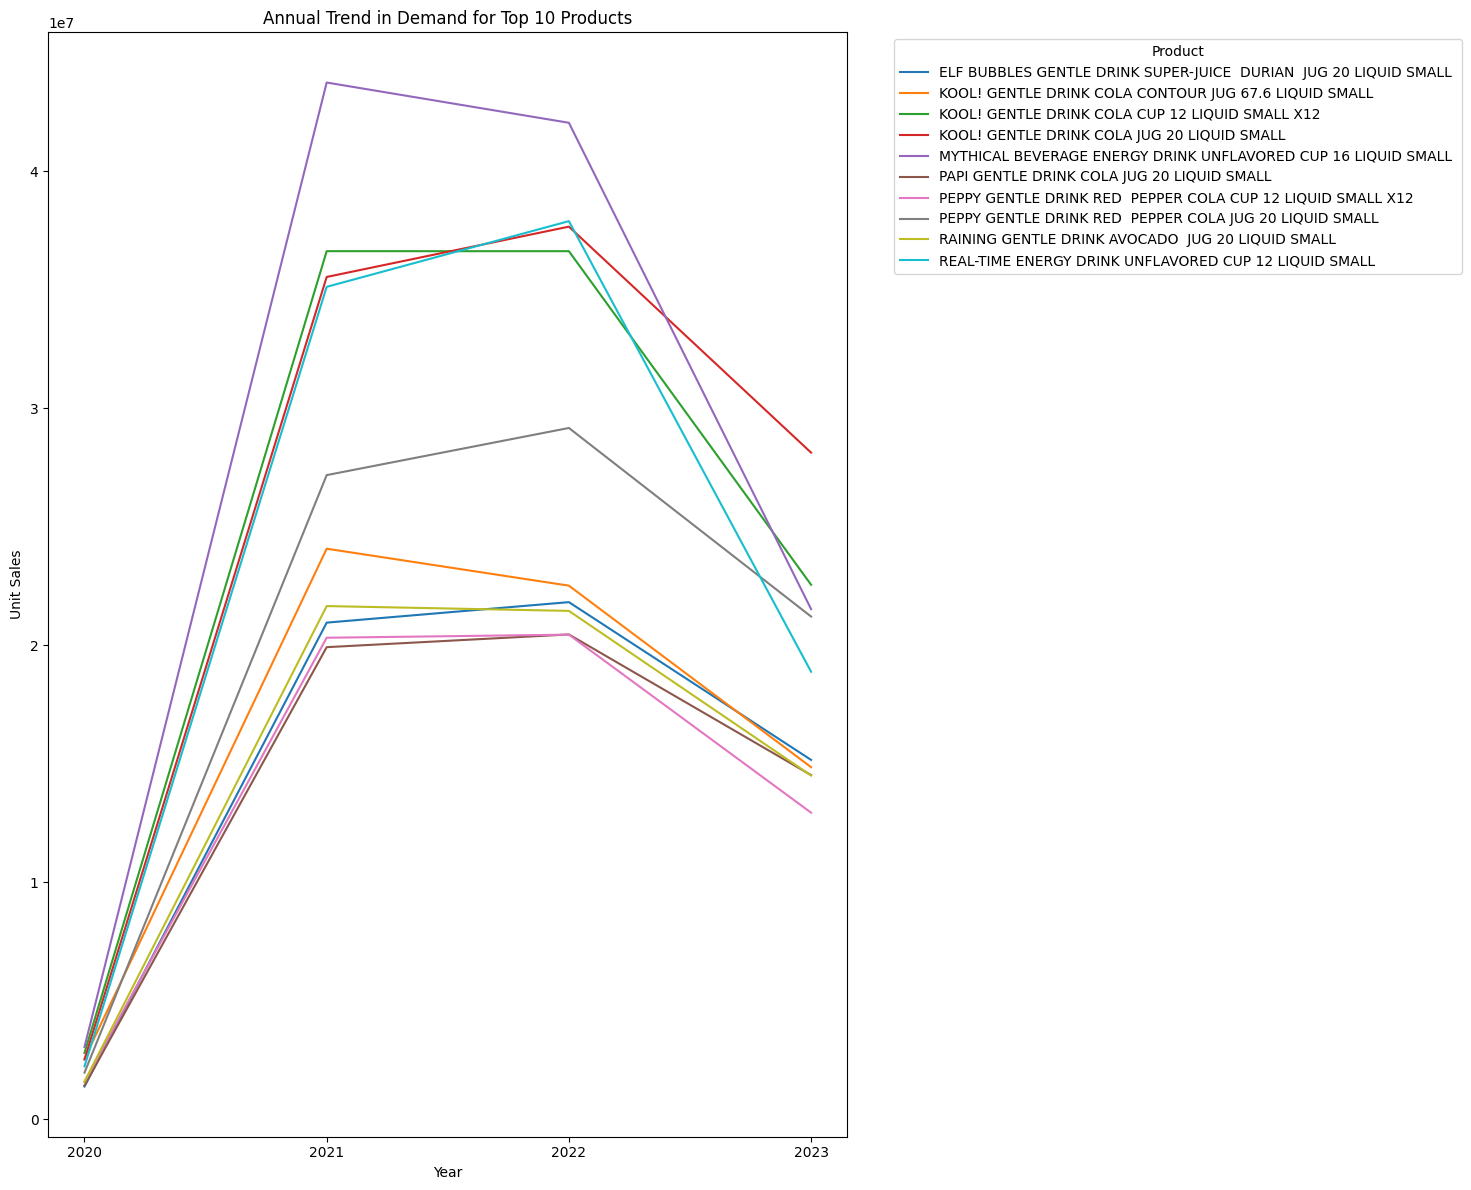

In [ ]:
# Creating a copy if lost
top_10_data = market_demand[market_demand['ITEM'].isin(top_10_products)].copy()

# Converting 'DATE' to datetime and sorting the DataFrame
top_10_data['DATE'] = pd.to_datetime(top_10_data['DATE'])
top_10_data.sort_values('DATE', inplace=True)

# Grouping by 'ITEM' and resampling by year, then summing up the unit sales
annual_data = top_10_data.groupby('ITEM').resample('Y', on='DATE').sum(numeric_only=True)

# Resetting the index to make 'ITEM' and 'DATE' regular columns again
annual_data.reset_index(inplace=True)

# Plotting the annual data
plt.figure(figsize=(15, 12))
sns.lineplot(data=annual_data, x=annual_data['DATE'].dt.year, y='UNIT_SALES', hue='ITEM')

# Setting the x-axis labels to be full years
plt.xticks(ticks=[2020, 2021, 2022, 2023], labels=['2020', '2021', '2022', '2023'])

plt.title('Annual Trend in Demand for Top 10 Products')
plt.xlabel('Year')
plt.ylabel('Unit Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The biggest seller in 2023 was 'KOOLI Gentle Drink Cola Jug 20 Liquid Small' which sold over **27 million units**. It experienced the most significant sales increase from 2020 to 2023. 'KOOLI Gentle Drink Cola Cup 12 Liquid Small X12' and 'MYTHICAL Beverage Energy Drink Unflavoured Cup 16 Liquid Small' also saw significant sales increases during the same period, around **24 and 22 million units**, respectively. The demand for 'KOOLI Gentle Drink Cola Contour Jug 67.6 Liquid Small' increased by about **24 million units** from 2020 to 2021 but did not sustain the same growth in 2022, losing about 2 million units in sales and selling only roughly 15 million units in 2023.



### Q2. What is the relation between UNIT SALES and DOLLAR SALES? <a name='5.2'></a>

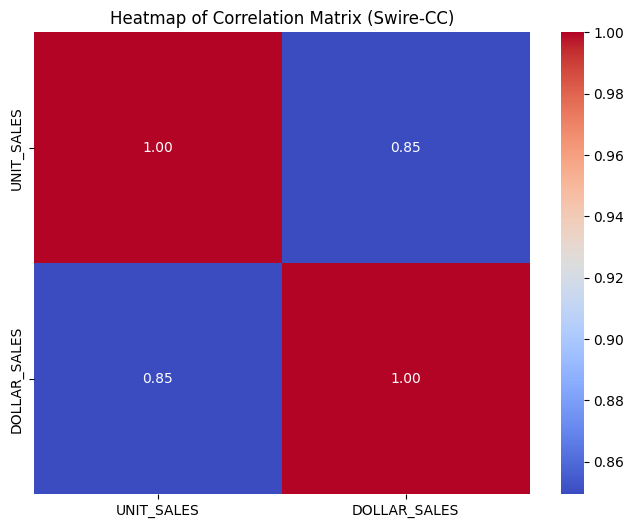

In [ ]:
# Plotting correlation matrix between the 'UNIT_SALES and 'DOLLAR_SALES'
numeric_vars = ['UNIT_SALES', 'DOLLAR_SALES']
correlation_matrix = market_demand[numeric_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix (Swire-CC)')
plt.show()

 In this heatmap, the correlation coefficient between **UNIT SALES** and **DOLLAR SALES** is 0.85, which is very close to 1. This indicates a **strong positive correlation** between the two variables but not equal to 1. This means that as the number of units sold increases, the total dollar revunue also increase. But the trend is not almost same. We will visualize it in the next plot.


In [ ]:
# Converting the 'DATE' column to datetime format
market_demand['DATE'] = pd.to_datetime(market_demand['DATE'])

# Setting the DATE as the index
market_demand.set_index('DATE', inplace=True)

# Grouping by 'ITEM' and resampling to weekly, summing up the 'UNIT_SALES' and 'DOLLAR_SALES'
weekly_sales = market_demand.groupby('ITEM')['UNIT_SALES'].resample('W').sum().reset_index()
weekly_sales_dollar = market_demand.groupby('ITEM')['DOLLAR_SALES'].resample('W').sum().reset_index()

# Sorting to ensure the order is correct for diff calculation
weekly_sales.sort_values(by=['ITEM', 'DATE'], inplace=True)

# Calculating week-over-week percentage change in 'UNIT_SALES' and 'DOLLAR_SALES'
weekly_sales['WOW_CHANGE'] = weekly_sales.groupby('ITEM')['UNIT_SALES'].pct_change() * 100
weekly_sales_dollar['WOW_CHANGE'] = weekly_sales_dollar.groupby('ITEM')['DOLLAR_SALES'].pct_change() * 100

# Finding the top 10 items by total 'UNIT_SALES' over the entire period
top_items = weekly_sales.groupby('ITEM')['UNIT_SALES'].sum().nlargest(10).index
top_items_dollar = weekly_sales_dollar.groupby('ITEM')['DOLLAR_SALES'].sum().nlargest(10).index

# Filtering the weekly_sales DataFrame to only include these top items
top_items_weekly_sales = weekly_sales[weekly_sales['ITEM'].isin(top_items)]

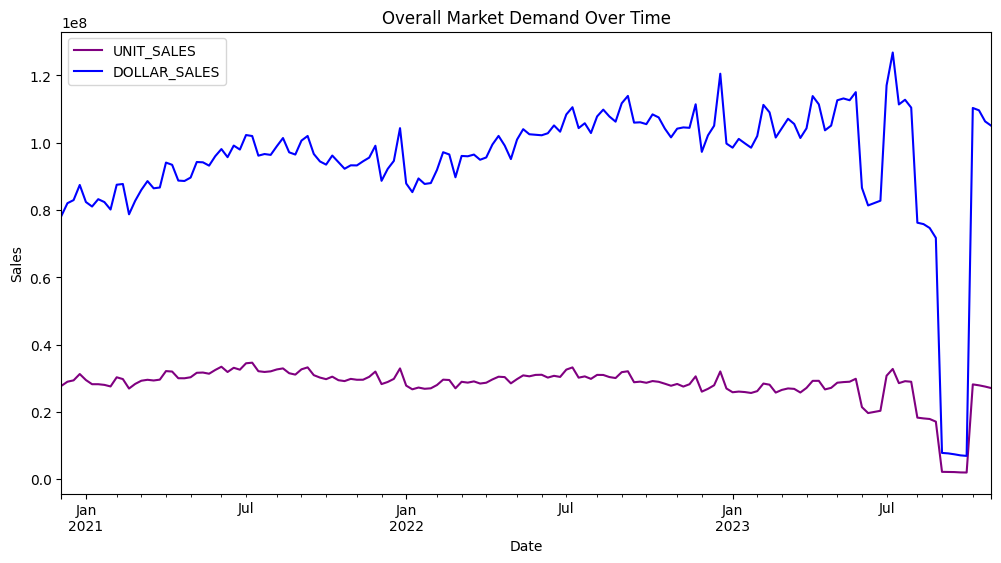

In [ ]:
# Plotting time-series
market_demand.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6), color='purple') # plotting overall market demand over time
market_demand.groupby('DATE')['DOLLAR_SALES'].sum().plot(figsize=(12, 6), color='blue') # plotting overall market demand over time

plt.title('Overall Market Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

This time series plot represents the overall market demand over time for all the products from January 2021 to July 2023.

The  overall market demand has increased over the past two years. There is a slight **upward trend** in the line, indicating that the **total revenue** has been **increasing** steadily over time.

Whereas the total number units sold are **almost constant** throught out the year.

So, from this we can say that the **correlation** between the dollar sales and unit sales is **0.85** because of slow trend in unit sales and upward trend of dollar revenue.

We can also say that **prices** of the products were increased over time that's why the dollar sales revenue increased over time as there is only **little upward trend** or **almost constant** of unit sales

### Q3. What is the week-over-week percentage change in unit sales for the products? <a name='5.3'></a>

In [ ]:
# Extracting the first few rows of the selected_rows starting from 1 as in 0 there is no prior week data
selected_rows = top_items_weekly_sales.iloc[1:10]
selected_rows

,ITEM,DATE,UNIT_SALES,WOW_CHANGE
102929,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2020-12-13,343898.0,4.131050
102930,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2020-12-20,345280.0,0.401863
102931,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2020-12-27,366213.0,6.062616
102932,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-01-03,338394.0,-7.596399
102933,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-01-10,333110.0,-1.561493
102934,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-01-17,328411.0,-1.410645
102935,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-01-24,308299.0,-6.124034
102936,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-01-31,300295.0,-2.596181
102937,ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN ...,2021-02-07,327062.0,8.913568


For the week ending on 2020-12-13, the unit sales of **ELF BUBBLES GENTLE DRINK SUPER-JUICE DURIAN JUG 20 LIQUID SMALL** were 343,898, representing a week-over-week increase of approximately 4.13%.

In the week ending on 2021-01-03, there was a notable decrease in unit sales, resulting in a negative week-over-week change of approximately **-7.60%**.

The following week ending on 2021-01-10 also experienced a negative week-over-week change, but to a lesser extent **-1.56%**.

In the subsequent weeks, the unit sales continue to fluctuate, with varying week-over-week percentage changes.

## ***Manufacture Data Analysis*** <a name='6'></a>

### Understanding the Manufacture data <a name='6.1'></a>

In [ ]:
# Getting the distinct or unique in manufacturer column

distinct_manufacturers = market_demand['MANUFACTURER'].unique()

# Printing the distinct manufacturers
print(distinct_manufacturers)

['SWIRE-CC' 'COCOS' 'JOLLYS' 'JORDYS' 'BEARS' 'PONYS' 'ALLYS' 'KEKES']


Here we can see that there are 8 distinct manufactures in this dataset.
They are **'SWIRE-CC' 'COCOS' 'JOLLYS' 'JORDYS' 'BEARS' 'PONYS' 'ALLYS' 'KEKES'**. Let's analyze their overall sales in both units and dollars.

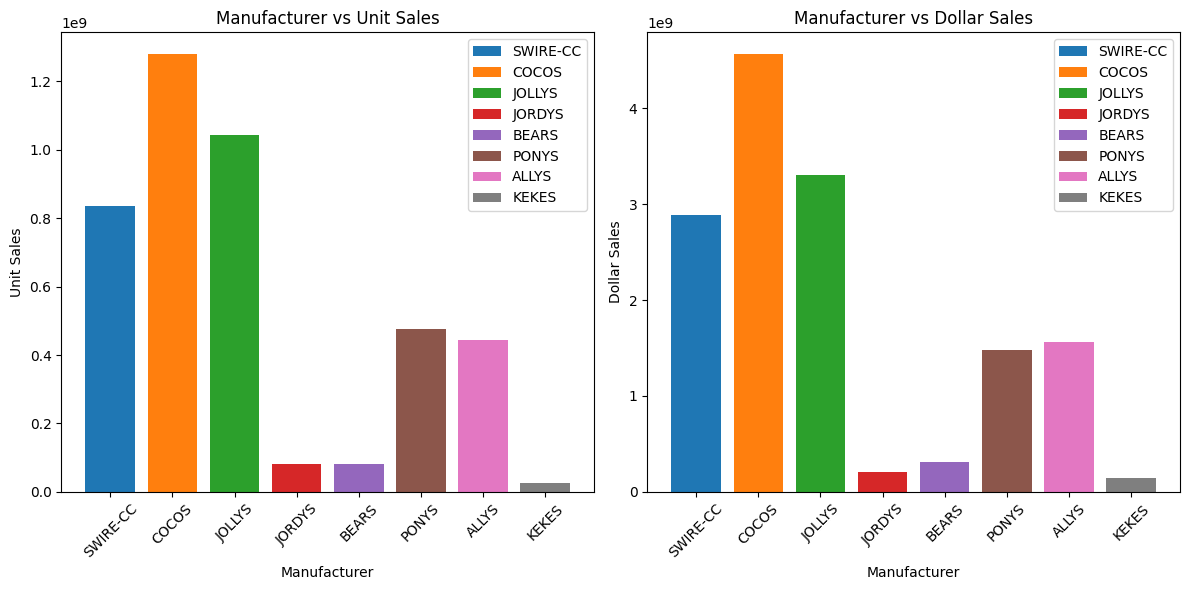

In [ ]:
# Plotting the manufacture vs sales (both unit and dollar)
market_demand.reset_index(inplace=True)
plt.figure(figsize=(12, 6))  # Creating the plot size.
plt.subplot(1, 2, 1) # Subplot for unit sales.
unique_manufacturers = market_demand['MANUFACTURER'].unique() # Finding the unique manufactures in the manufactures column.

# Plotting the unit sales for each unique manufactures.
for manufacturer in unique_manufacturers:
    subset = market_demand[market_demand['MANUFACTURER'] == manufacturer]
    plt.bar(manufacturer, subset['UNIT_SALES'].sum(), label=manufacturer)

# Assigning the title, xlabel and ylabel along with legend.

plt.title('Manufacturer vs Unit Sales')
plt.xlabel('Manufacturer')
plt.ylabel('Unit Sales')
plt.legend()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2) # Subplot for dollar sales.
unique_manufacturers = market_demand['MANUFACTURER'].unique()

# Plotting the dollar sales for each unique manufactures.
for manufacturer in unique_manufacturers:
    subset = market_demand[market_demand['MANUFACTURER'] == manufacturer]
    plt.bar(manufacturer, subset['DOLLAR_SALES'].sum(), label=manufacturer)

# Assigning the title, xlabel and ylabel along with legend.
plt.title('Manufacturer vs Dollar Sales')
plt.xlabel('Manufacturer')
plt.ylabel('Dollar Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**COCOS** and **JOLLYS** are the most prolific manufacturers, with unit sales as high as 1 to 1.2 million and dollar sales around 3 to 5 million. In contrast, **KEKES**, **BEARS**, and **JORDYS** have notably lower sales, around 0.1 million units, compared to the others. **PONYS** and **ALLYS** have significant sales of around 0.5 million units. SWIRE-CC, with more than 0.8 million unit sales and around 3 million in dollar sales, secures third place in the market after **COCOS** and **JOLLYS**. Let's examine the time series visualization of unit sales further to see if this pattern persists over time.

### Q1. What is the market size of different manufacturing categories? <a name='6.2'></a>

In [ ]:
# Filtering the rows based on the different manufactures.
swire = market_demand[market_demand['MANUFACTURER'] == 'SWIRE-CC']
cocos = market_demand[market_demand['MANUFACTURER'] == 'COCOS']
jolly = market_demand[market_demand['MANUFACTURER'] == 'JOLLYS']
jordys = market_demand[market_demand['MANUFACTURER'] == 'JORDYS']
bears = market_demand[market_demand['MANUFACTURER'] == 'BEARS']
ponys = market_demand[market_demand['MANUFACTURER'] == 'PONYS']
allys = market_demand[market_demand['MANUFACTURER'] == 'ALLYS']
keks = market_demand[market_demand['MANUFACTURER'] == 'KEKES']

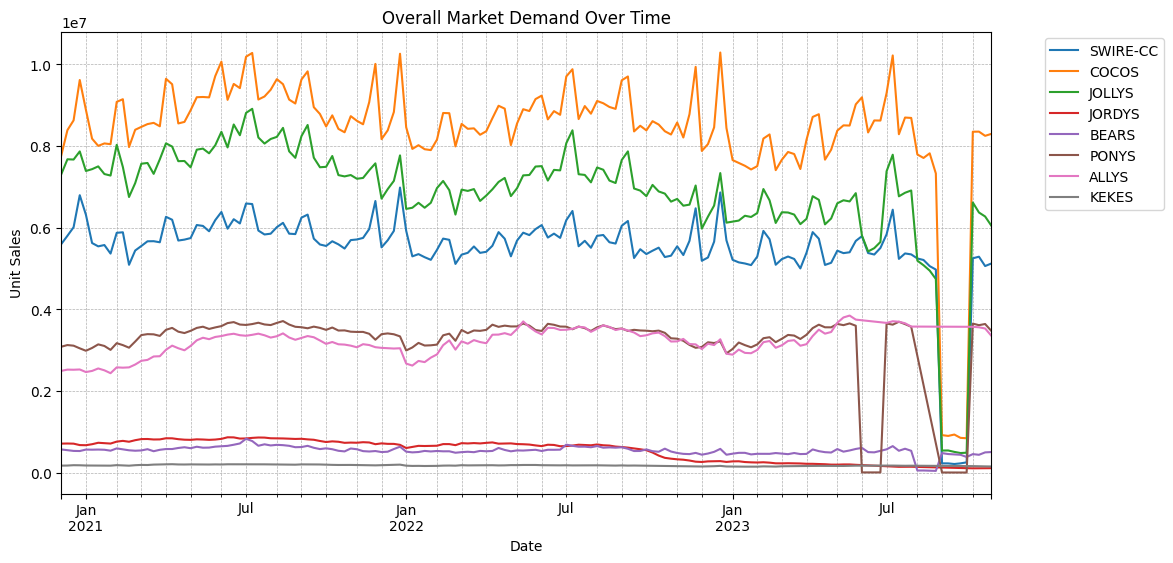

In [ ]:
# Plotting the unit sales for different manufactures over the time period.
swire.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
cocos.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
jolly.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
jordys.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
bears.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
ponys.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
allys.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
keks.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
plt.title('Overall Market Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['SWIRE-CC','COCOS','JOLLYS','JORDYS','BEARS','PONYS','ALLYS','KEKES'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


As mentioned previously, the overall sales volumes, as depicted in the time series plot, show that **COCOS**, **JOLLYS**, and **SWIRE-CC** are the top three manufacturers, with KEKES, JORDYS, and BEARS as the lowest three, and ALLYS and PONYS in the middle. It's notable that sales for almost all products dropped to nearly zero in the last quarter of 2023, necessitating further analysis with the manufacturers to understand this decline. Increases in sales were observed in May, June, November, and December of both 2021 and 2022. Our analysis primarily focuses on **SWIRE-CC** as our manufacturer.

### Q2. What is the 'Swire-cc' market size? <a name='6.3'></a>

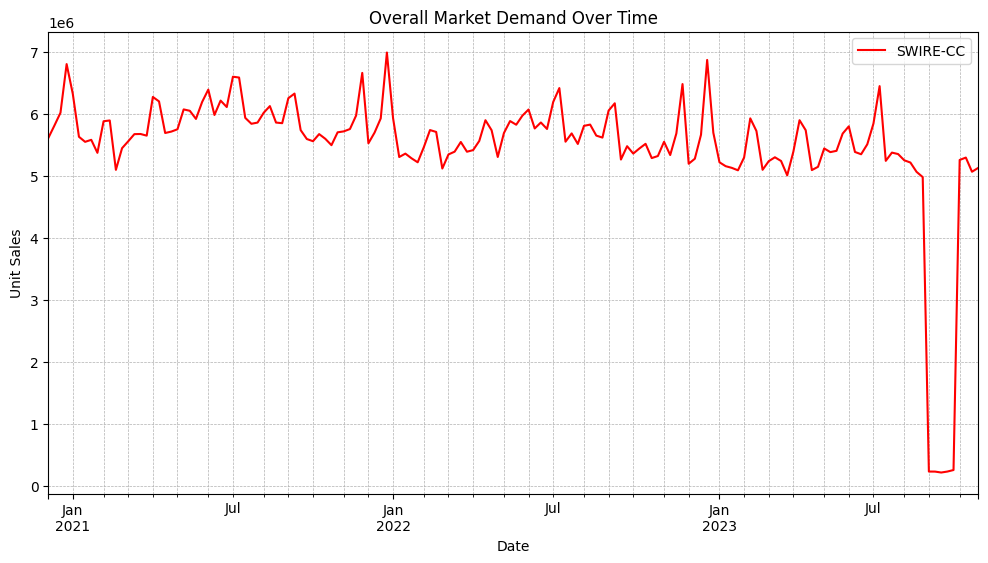

In [ ]:
# Plotting the SWIRE-CC dataset to plot the unit sales over time period
swire.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='red')
plt.title('Overall Market Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['SWIRE-CC'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

We can see only the **SWIRE-CC** sales over time and **SWIRE** have sales peak over in November and December every year maybe due to Christmas and Thanks giving. Also the sales increase in May and June every year. From now on, we mostly only consider SWIREE-CC as manufacture in our analysis as **SWIRE-CC** is our only manufacturer in our modeling questions.

### Q3. What is the market size of Caloric Segements 'DIET/LIGHT' and 'REGULAR' in 'SWIRE-CC'? <a name='6.4'></a>

In [ ]:
# Creating the new dataset as diet by filtering the swire dataset where the caloric segment is only Diet/Light
diet= swire[swire['CALORIC_SEGMENT'] == 'DIET/LIGHT']

In [ ]:
# Creating the new dataset as regular by filtering the swire dataset where the caloric segment is only Regular
regular= swire[swire['CALORIC_SEGMENT'] == 'REGULAR']

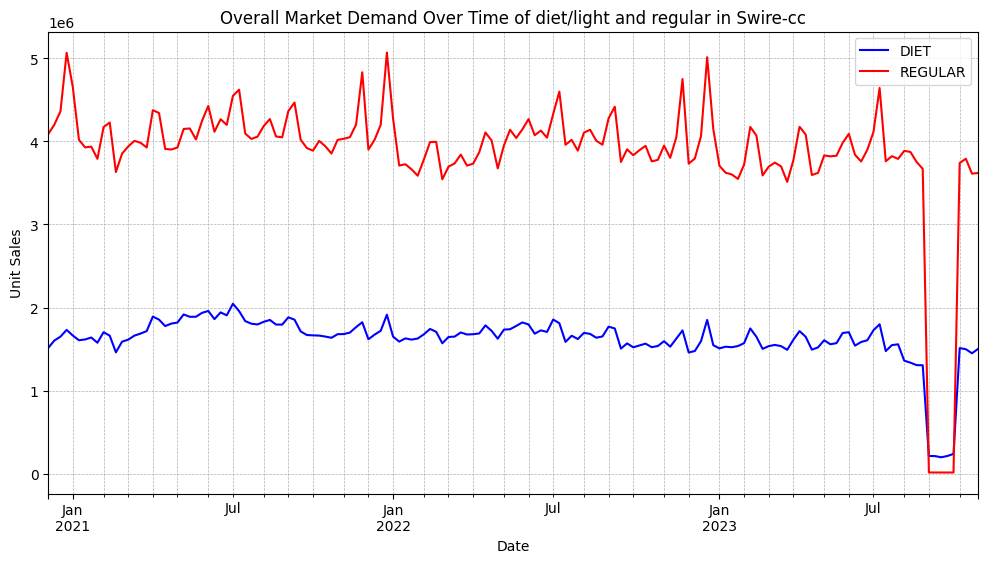

In [ ]:
# Plotting the overall market demand over time for diet/light and regular caloric segment in SWIRE-CC
diet.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='blue')
regular.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='red')
plt.title('Overall Market Demand Over Time of diet/light and regular in Swire-cc')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['DIET','REGULAR'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

We can see that 'REGULAR' has more than double sales over 'DIET' in caloric segment in 'SWIRE-CC'. Also the 'REGULAR' follows almost SWIRE-CC sales pattern with peaks in November and December. The 'DIET' sales are **dropped slightly** from 2021 to 2022 or 2023.

We need analyze the categories in the caloric segment. According to the problem questions provided by the SWIRE-CC the combinations of caloric segment and categories are:

**DIET** with **ENERGY** and **SPARKLING WATER**

**REGULAR** with **SSD** and **ING ENHANCED WATER**

Let's analyze these combinations.

### Q4. What is the market size of different categories in 'Swire-cc' and diet caloric segment? <a name='6.5'></a>

In [ ]:
# Creating the new dataset energy by filtering the diet (in SWIRE-CC) dataset where the category is energy.
energy = diet[diet['CATEGORY'] == 'ENERGY']

In [ ]:
# Creating the new dataset swater by filtering the diet (in SWIRE-CC) dataset where the category is sparkling water.
swater= diet[diet['CATEGORY'] == 'SPARKLING WATER']

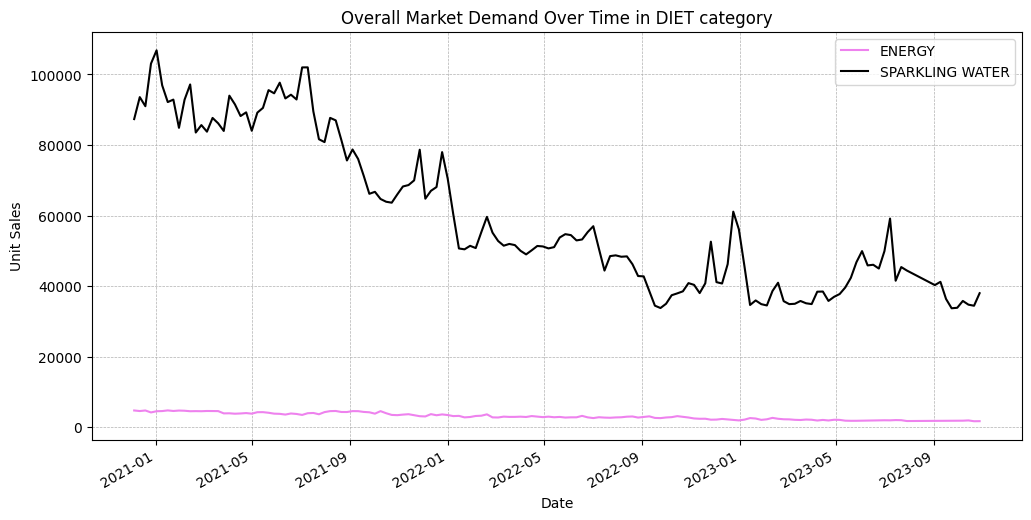

In [ ]:
# Plotting the overall market demand of energy and sparkling categories over time in diet segment over swire-cc.
energy.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='violet')
swater.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='black')
plt.title('Overall Market Demand Over Time in DIET category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['ENERGY','SPARKLING WATER'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

The plot shows that the **SPARKING WATER** has more sales when compared to the **ENERGY**. But, the SPARKING WATER sales are also drastically decreased in 2022 and 2023 when compared to 2021. We can say that the sales of ENERGY drinks in DIET category in SWIRE-CC are very low.

### Q5. What is the market size of 'SSD' and 'ING ENHANCED WATER' categories in 'SWIRE-CC' manufacturer and 'REGULAR' caloric segment? <a name='6.6'></a>

In [ ]:
# Creating the new datasets SSD and Enhanced by filtering the regular (in SWIRE-CC) dataset where the category is SSD and ING Enhanced Water respectively.
ssd= regular[regular['CATEGORY'] == 'SSD']
enhanced= regular[regular['CATEGORY'] == 'ING ENHANCED WATER']

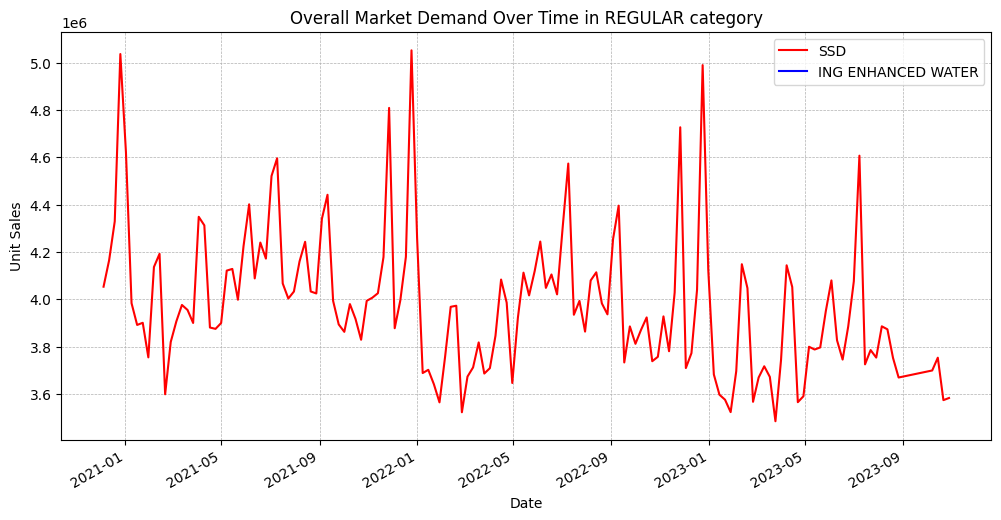

In [ ]:
# Plotting the overall market demand over time in regular category
ssd.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='red')
enhanced.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='blue')
plt.title('Overall Market Demand Over Time in REGULAR category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['SSD', 'ING ENHANCED WATER'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

We can see from the visualization that the **ING ENHANCED WATER** has no sales in **REGULAR** category over SWIRE-CC. So, for this combination problem we have to find another way to analyze the solution.

But **SSD** has sales with peaks at November and December over years.

## ***Category Data Analysis*** <a name='7'></a>

In [ ]:
# Checking for unique values in the Category column of Market Demand dataset
distinct_categories = market_demand['CATEGORY'].unique()
print(distinct_categories)

['SSD' 'ING ENHANCED WATER' 'SPARKLING WATER' 'ENERGY' 'COFFEE']


We can see that we have 5 different types of categories. Let's analyse their sales in the next plot.

### Q1. What are the Unit/Dollar Sales for Category over time? <a name='7.1'></a>

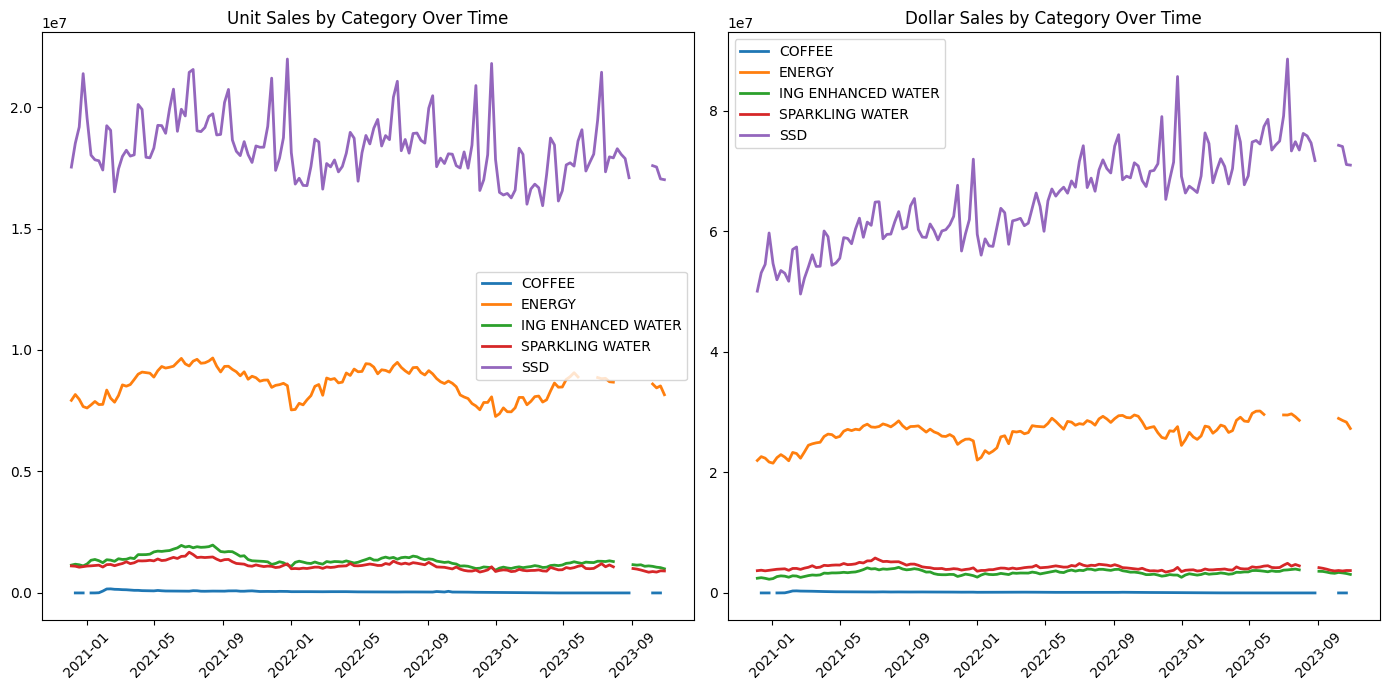

In [ ]:
market_demand['DATE'] = pd.to_datetime(market_demand['DATE'])
grouped = market_demand.groupby(['DATE', 'CATEGORY']).agg({'UNIT_SALES':'sum', 'DOLLAR_SALES':'sum'}).reset_index()

# Pivoting the data for easier plotting
pivot_unit_sales = grouped.pivot(index='DATE', columns='CATEGORY', values='UNIT_SALES')
pivot_dollar_sales = grouped.pivot(index='DATE', columns='CATEGORY', values='DOLLAR_SALES')

# Plotting time-series visualizations
plt.figure(figsize=(14, 7))

# Unit Sales
plt.subplot(1, 2, 1)
plt.plot(pivot_unit_sales.index, pivot_unit_sales, marker='', linewidth=2)
plt.title('Unit Sales by Category Over Time')
plt.legend(pivot_unit_sales.columns,loc='center right')
plt.xticks(rotation=45)

# Dollar Sales
plt.subplot(1, 2, 2)
plt.plot(pivot_dollar_sales.index, pivot_dollar_sales, marker='', linewidth=2)
plt.title('Dollar Sales by Category Over Time')
plt.legend(pivot_dollar_sales.columns)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The **SSD** followed by **ENERGY** have the highest sales whereas the **COFFEE** has negligible very low sales. And **SPARKLING** and **ING ENHANCED WATER** have better sales when compared to COFFEE.

### Q2. How can we understand the diversity of Category by Brand? <a name='7.2'></a>

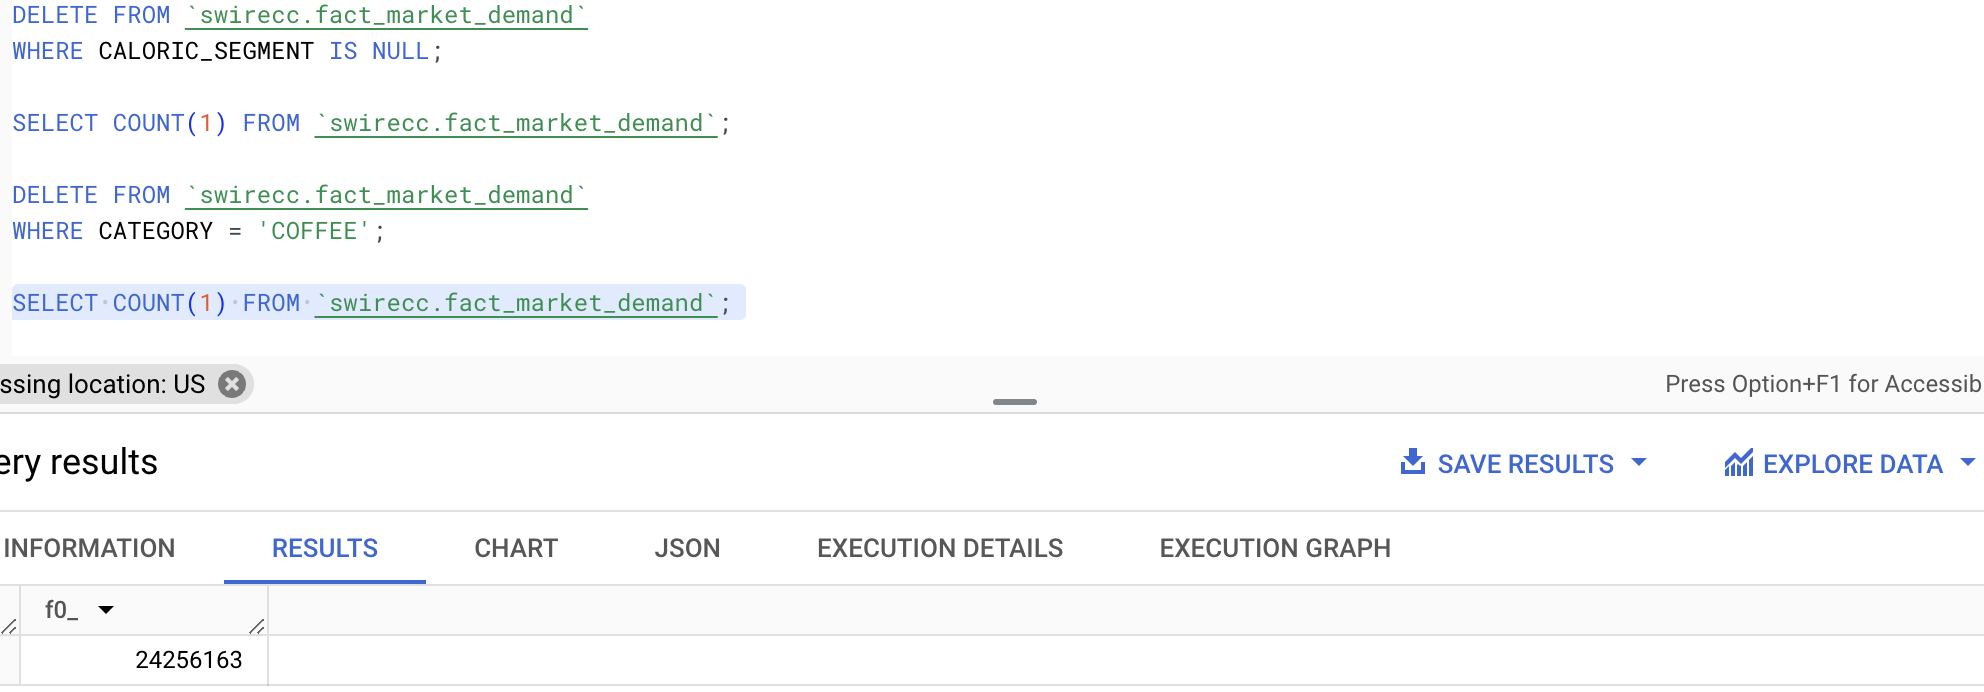

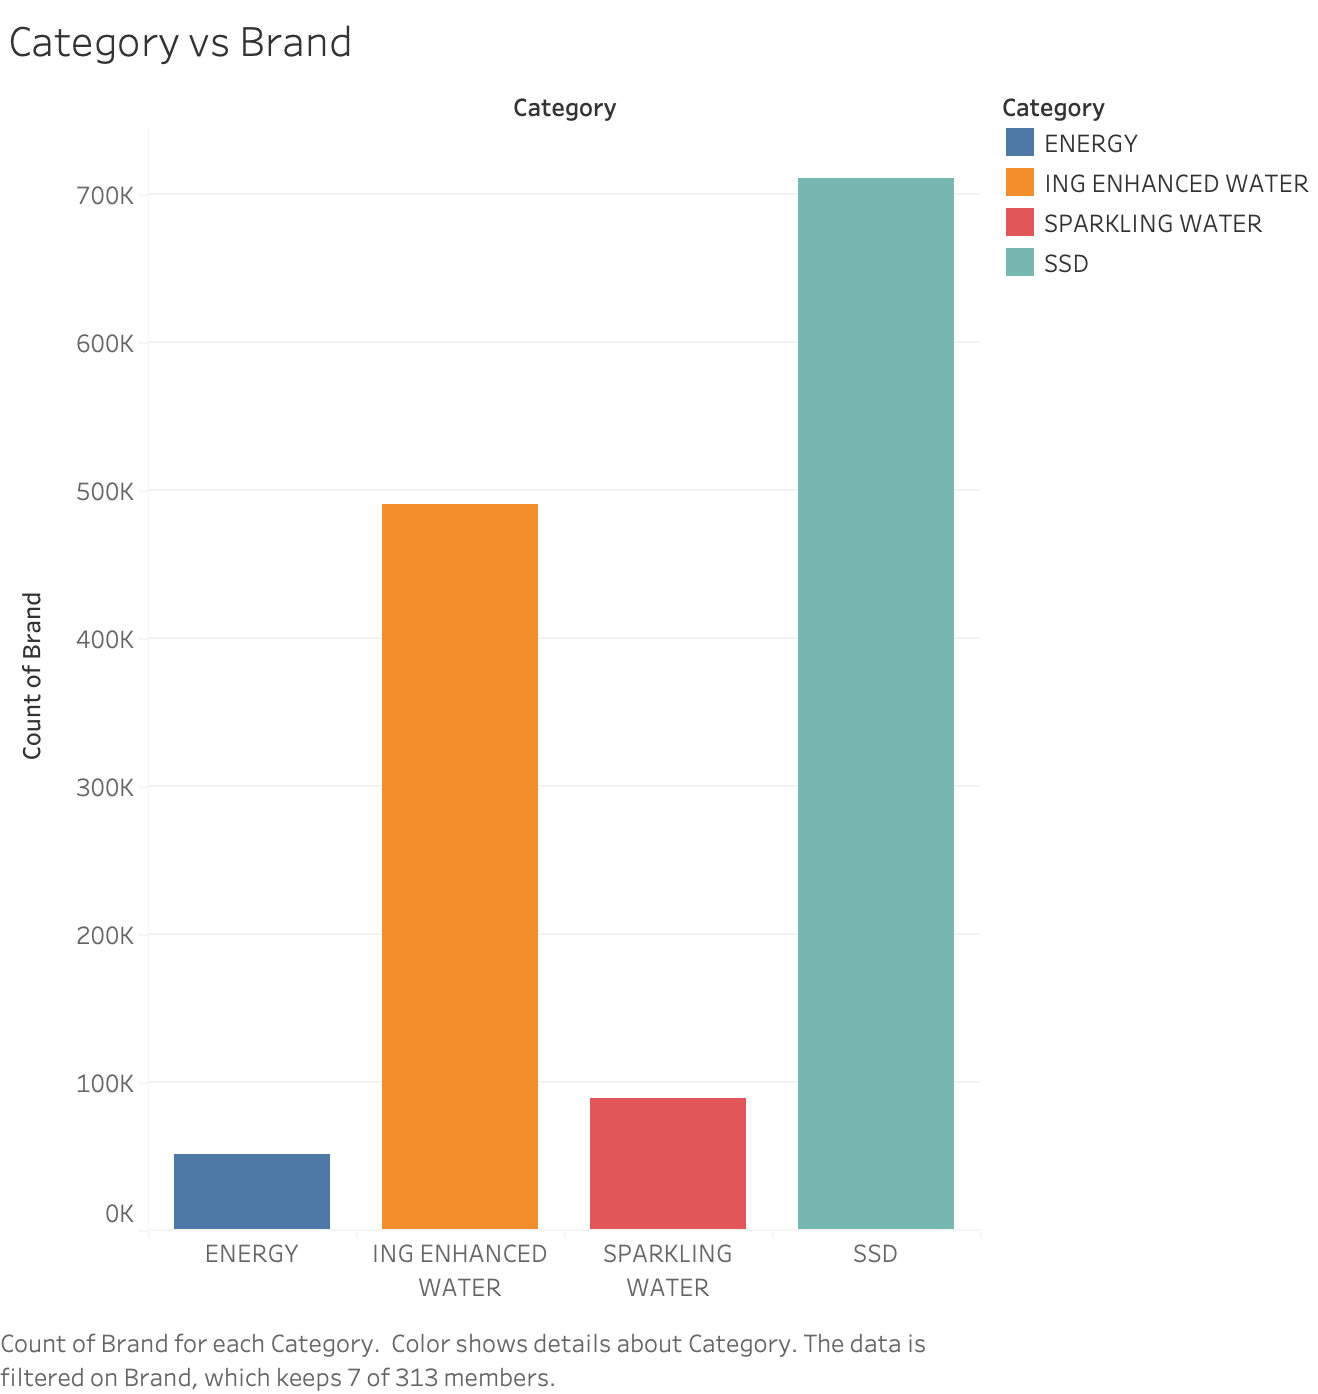

From this plot we can say that there are over 700000 **branded drink unit sales** associated with the **SSD** and around 500000 branded sales associated with **ING ENHANCED WATER** where as the SPARKLING WATER and ENERGY have less than 100000 branded drinks associated with it.

### Q3. What is the overall demand in Diet Category over time? <a name='7.3'></a>

In [ ]:
# Filtering the rows based on different categories in diet/light caloric segment
market_demand_swire=market_demand[market_demand['MANUFACTURER'] == 'SWIRE-CC']
total_ssd=market_demand_swire[market_demand_swire['CATEGORY'] == 'SSD']
total_energy=market_demand_swire[market_demand_swire['CATEGORY'] == 'ENERGY']
total_sparkling= market_demand_swire[market_demand_swire['CATEGORY'] == 'SPARKLING WATER']
total_ingwater= market_demand_swire[market_demand_swire['CATEGORY'] == 'ING ENHANCED WATER']

The different categories combinations provided in the innovative products are:

**SWIRE - SSD - DIET SMASH**

**SWIRE - SSD - PEPPY**

**SWIRE - SSD - SPARSPARKLING JACCEPTABLETLESTER**

**SWIRE - ENERGY - VENOMOUS BLAST**

**SWIRE - ENERGY - DIET MOONLIT**

**SWIRE - SPARKLING WATER - SQUARE**

**SWIRE - ING ENHANCED WATER - GREETINGLE**

So, Let's filter these rows and visualize them in time series.

In [ ]:
# Filtering the rows based on different brands in different categories of diet/light caloric segment.
dietsmash=total_ssd[total_ssd['BRAND']=='DIET SMASH']
peppy=total_ssd[total_ssd['BRAND']=='PEPPY']
sparkling= total_ssd[total_ssd['BRAND']=='SPARKLING JACCEPTABLETLESTER']
blast=total_energy[total_energy['BRAND']=='VENOMOUS BLAST']
moonlight=total_energy[total_energy['BRAND']=='DIET MOONLIT']
square= total_sparkling[total_sparkling['BRAND']=='SQUARE']
greetingle=total_ingwater[total_ingwater['BRAND']=='GREETINGLE']

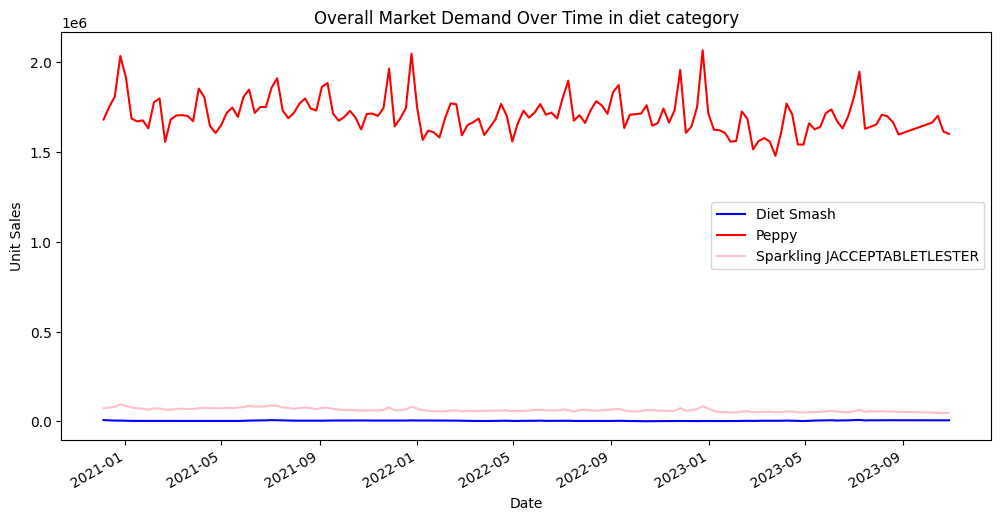

In [ ]:
# Plotting overall market demand for brands such as diet smash,peppy,sparkling water.
dietsmash.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6), color='blue')
peppy.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='red')
sparkling.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='pink')
plt.title('Overall Market Demand Over Time in diet category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['Diet Smash', 'Peppy', 'Sparkling JACCEPTABLETLESTER'])
plt.show()

In diet category the **Peppy** has more sales when compared to the **Diet Samsh** and **Sparkling JACCEPTABLETLESTER**.

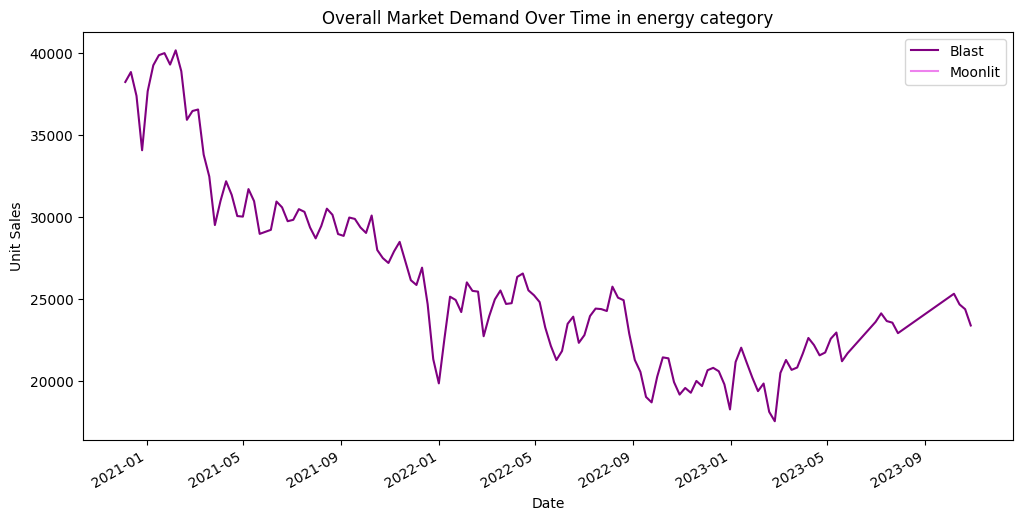

In [ ]:
# Plotting overall market demand for Blast and Moonlight brands in energy category.
blast.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='purple')
moonlight.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='violet')
plt.title('Overall Market Demand Over Time in energy category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['Blast', 'Moonlit'])
plt.show()

In energy category there are **no Moonlit** sales. So, we need to use other analysis methods for modeling analysis.

Also, we can see that the unit sales are **dropping** for 2020 to 2023 for the Blast sales in energy category.

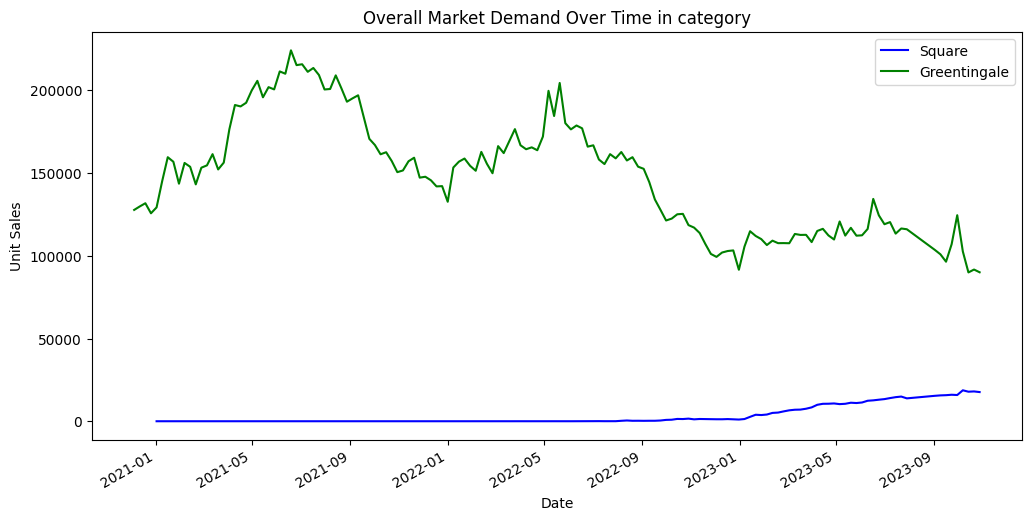

In [ ]:
# Plotting overall market demand for Square and Greentingale brands in diet/light category.
square.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='blue')
greetingle.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='green')
plt.title('Overall Market Demand Over Time in category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['Square', 'Greentingale'])
#plt.legend(title='Category', bbox_to_anchor=(1, 1))
plt.show()

We can see that Square sales are **increasing** over time starting from 2023-01 as maybe the **product is introduced in late 2022** but the data is only untill 2022-09.

Whereas the Greetingle has **sales peak in June** of every year before dropping in sales.

### Q4. What is the overall demand in Diet Category for 'Swire' manufacturer over time with calorie and also brand analysis? <a name='7.4'></a>


Here, we go further in the analysis by adding category segments to the above plotted analysis and investigate it further.

SWIRE - CALORIE- CATEGORY- BRAND

In [ ]:
# Filtering the data based on different brands in the ssd category
dietssdsmash= dietsmash[dietsmash['CALORIC_SEGMENT']=='DIET']
regularssdpeppy=peppy[peppy['CALORIC_SEGMENT']=='REGULAR']
regularssdsparkling=sparkling[sparkling['CALORIC_SEGMENT']=='REGULAR']
# Filtering the data based on different brands in the ssd category, Both gives same result
# ssddietsmash=ssd[ssd['BRAND']=='DIET SMASH']
# ssdpeppy=ssd[ssd['BRAND']=='PEPPY']
# ssdsparkling= ssd[ssd['BRAND']=='SPARKLING JACCEPTABLETLESTER']

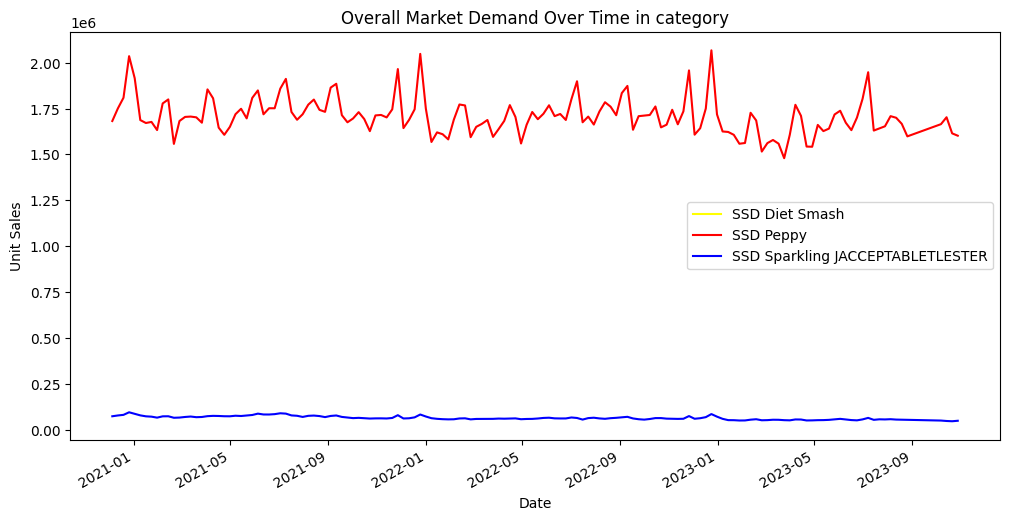

In [ ]:
# Plotting overall market demand over time for different brands in ssd category.
dietssdsmash.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='yellow')
regularssdpeppy.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='red')
regularssdsparkling.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6),color='blue')
plt.title('Overall Market Demand Over Time in category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['SSD Diet Smash', 'SSD Peppy', 'SSD Sparkling JACCEPTABLETLESTER'])
plt.show()

We can see that the there are very **low sales of SSD segment sparkling JACCEPTABLETLESTER **brand in diet category in swire-cc and ssd peppy is the most sold product, where as there are **no products** in **SSD diet smash** over in diet caloric segment.

In [ ]:
# Filtering the data based on different brands in the energy category
energyblast=energy[energy['BRAND']=='VENOMOUS BLAST']
energymoonlight=energy[energy['BRAND']=='DIET MOONLIT']
# dietblast=blast[blast['CALORIC_SEGMENT']=='DIET']
# dietmoonlight=moonlight[moonlight['CALORIC_SEGMENT']=='DIET']


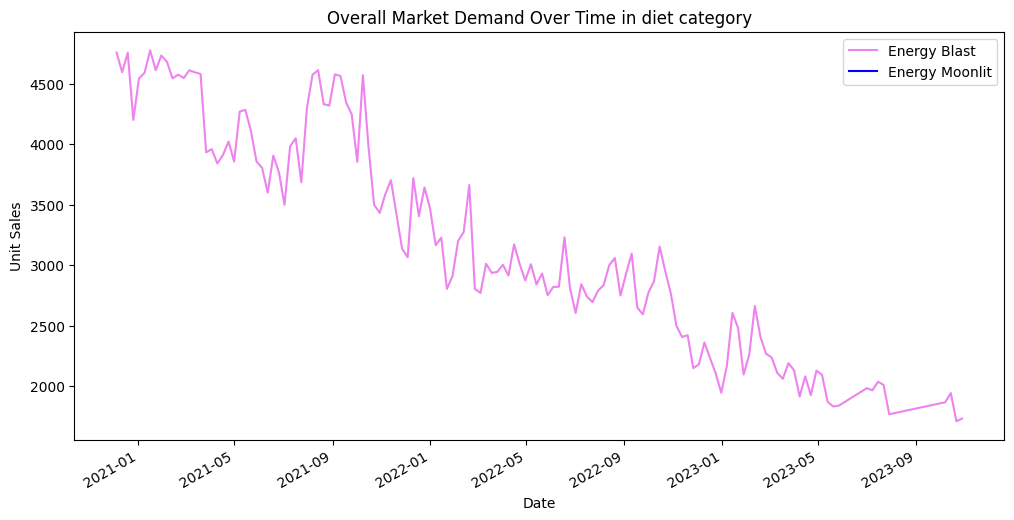

In [ ]:
# Plotting overall market demand over time for different brands in energy category.
energyblast.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6), color='violet')
energymoonlight.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6), color='blue')

plt.title('Overall Market Demand Over Time in diet category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['Energy Blast', 'Energy Moonlit'])
plt.show()

The energy category over diet segment of the venomous blast brand has the **downward trend** as sales decrease over a period of time.

Whereas, their is **no produced** described for the **energy category over diet segment of the moonlit brand.**

In [ ]:
# Filtering the data based on brands in the category of sparkling water and ing-enhanced water.
sparklingsquare= swater[swater['BRAND']=='SQUARE']
enhancedgreetingle= enhanced[enhanced['BRAND']=='GREETINGLE']

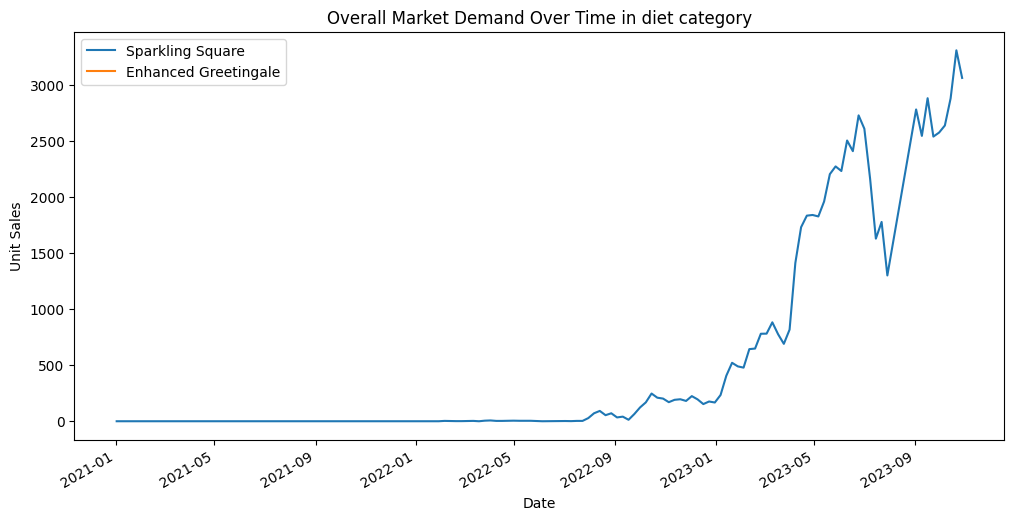

In [ ]:
# Plotting overall market demand over time for different brands in sparkling water and ing-enhanced category.
sparklingsquare.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
enhancedgreetingle.groupby('DATE')['UNIT_SALES'].sum().plot(figsize=(12, 6))
plt.title('Overall Market Demand Over Time in diet category')
plt.xlabel('Date')
plt.ylabel('Unit Sales')
plt.legend(['Sparkling Square', 'Enhanced Greetingale'])
plt.show()

The **sparkling water category in square brand in energy drink** segment has an upward trend as sales increase over the period only after the 2022-08, maybe the **product in these segment introduced** near to 2022-08.

Where as the **ING enhanced water category in Greetingle brand has no product** specified in the regular segment.


## ***Caloric Segment Analysis*** <a name='8'></a>

In [ ]:
distinct_caloric = market_demand['CALORIC_SEGMENT'].unique()

# Print the distinct manufacturers
print(distinct_caloric)

['DIET/LIGHT' 'REGULAR' nan]


Here we can see that there are 3 distinct categories in the calorics segment. They are **DIET/LIGHT, REGULAR and nan**. The nan is not null or missing values rather it is a third distinct category that doesn't belong to neither DIET/LIGHT or REGULAR. So, we update the **nan to None** category.

In [ ]:
#replace nan to none for CALORIC_SEGMENT column

market_demand['CALORIC_SEGMENT'] = market_demand['CALORIC_SEGMENT'].fillna('None')
distinct_caloric = market_demand['CALORIC_SEGMENT'].unique()

# Print the distinct manufacturers
print(distinct_caloric)

['DIET/LIGHT' 'REGULAR' 'None']


We have changed the **nan to None** category.

In [ ]:
# total dollar sales by caloric segment
print(market_demand.groupby(['CALORIC_SEGMENT'])['DOLLAR_SALES'].sum())

CALORIC_SEGMENT
DIET/LIGHT    5.378058e+09
None          8.100379e+06
REGULAR       9.073970e+09
Name: DOLLAR_SALES, dtype: float64


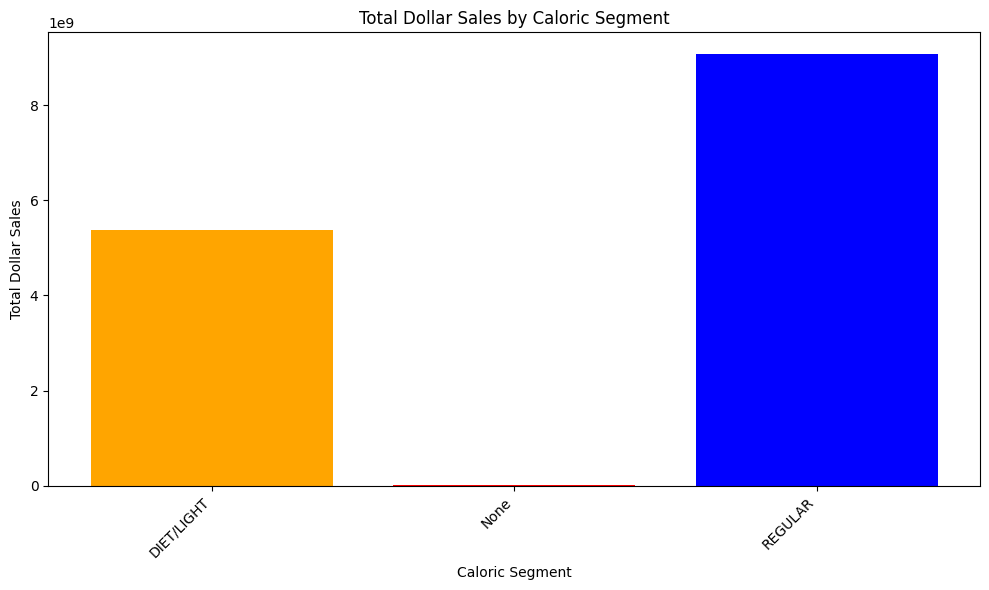

In [ ]:
# Perform groupby operation
grouped_data = market_demand.groupby(['CALORIC_SEGMENT'])['DOLLAR_SALES'].sum()
# Extracting data for plotting
caloric_segments = grouped_data.index
dollar_sales = grouped_data.values

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
plt.bar(caloric_segments, dollar_sales, color=['orange','red','blue'])

# Adding labels and title
plt.xlabel('Caloric Segment')
plt.ylabel('Total Dollar Sales')
plt.title('Total Dollar Sales by Caloric Segment')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent labels from getting cut off
plt.show()

We can see that the **None** type has around 8.1*10^6 which is quite low when compare to 'DIET' type and 'REGULAR' type. And we will remove the None
type from this caloric segment since the problem questions doesn't have None type with it.

In [ ]:
# removing the None rows in the caloric segment.
market_demand=market_demand[market_demand['CALORIC_SEGMENT'] != 'None']

### Q1. What is the distribution of dollar sales and unit sales of Caloric Segment per Year? <a name='8.1'></a>

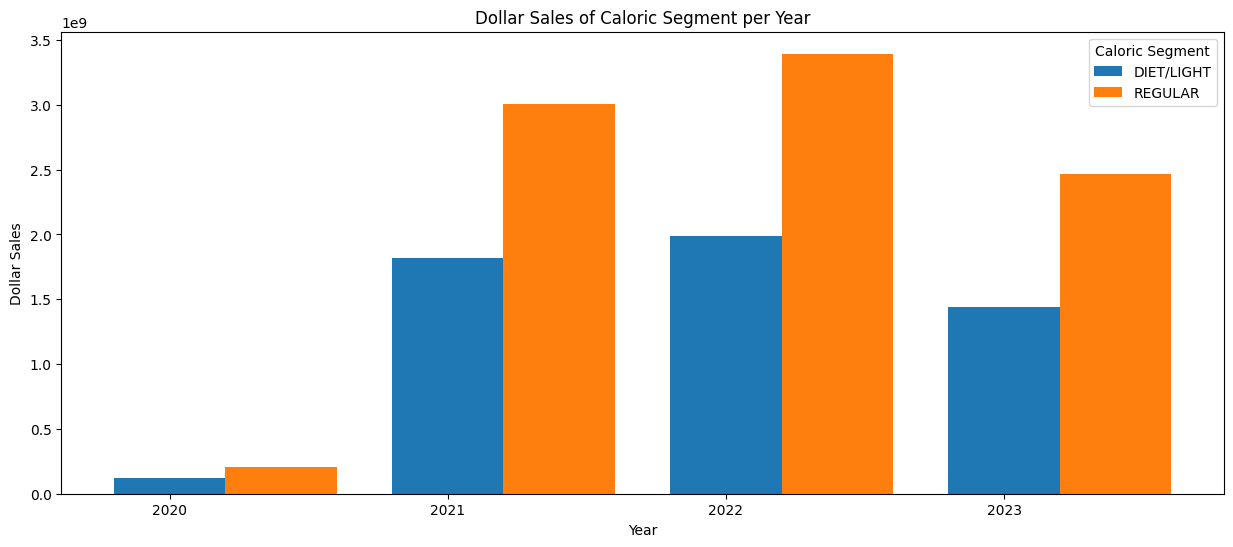

In [ ]:
# plot using matplotlib to have multiple bar plot to get dollar sales of CALORIC_SEGMENT for year to year

market_demand['YEAR'] = pd.to_datetime(market_demand['DATE'])
market_demand['YEAR']=market_demand['YEAR'].dt.year
# Group data by year and caloric segment
grouped_data = market_demand.groupby(['YEAR', 'CALORIC_SEGMENT'])['DOLLAR_SALES'].sum().reset_index()

# Create a dictionary to store data for each year
year_data = {}
for year in grouped_data['YEAR'].unique():
    year_data[year] = grouped_data[grouped_data['YEAR'] == year]

distinct_caloric = grouped_data['CALORIC_SEGMENT'].unique()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set title and labels
plt.title('Dollar Sales of Caloric Segment per Year')
plt.xlabel('Year')
plt.ylabel('Dollar Sales')

# Set x-axis ticks and labels
x_ticks = np.arange(len(year_data))
x_labels = list(year_data.keys())
plt.xticks(x_ticks, x_labels)

# Set bar width
bar_width = 0.8 / len(distinct_caloric)

for i, caloric_segment in enumerate(distinct_caloric):
  caloric_data = []
  for year, data in year_data.items():
    caloric_data.append(data[data['CALORIC_SEGMENT'] == caloric_segment]['DOLLAR_SALES'].values[0])
  ax.bar(x_ticks + i * bar_width, caloric_data, width=bar_width, label=caloric_segment)


# Add legend and show plot
plt.legend(title='Caloric Segment')
plt.show()

From the bar graph we can depict the dollar revenue **increased** in 2022 when compared to the 2021 around **10%**.

We have to check whether the increase is due to **increase in the unit sales** or due to the **inflation and price rise** of the product.

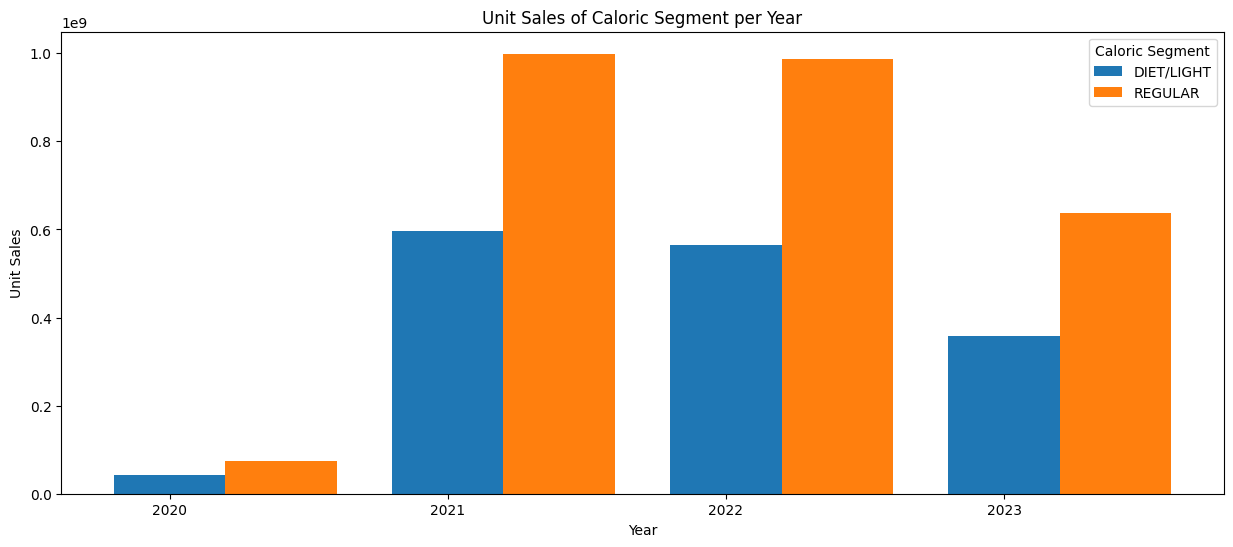

In [ ]:
# plot using matplotlib to have multiple bar plot to get dollar sales of CALORIC_SEGMENT for year to year

market_demand['YEAR'] = pd.to_datetime(market_demand['DATE'])
market_demand['YEAR']=market_demand['YEAR'].dt.year
# Group data by year and caloric segment
grouped_data = market_demand.groupby(['YEAR', 'CALORIC_SEGMENT'])['UNIT_SALES'].sum().reset_index()

# Create a dictionary to store data for each year
year_data = {}
for year in grouped_data['YEAR'].unique():
    year_data[year] = grouped_data[grouped_data['YEAR'] == year]

distinct_caloric = grouped_data['CALORIC_SEGMENT'].unique()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 6))

# Set title and labels
plt.title('Unit Sales of Caloric Segment per Year')
plt.xlabel('Year')
plt.ylabel('Unit Sales')

# Set x-axis ticks and labels
x_ticks = np.arange(len(year_data))
x_labels = list(year_data.keys())
plt.xticks(x_ticks, x_labels)

# Set bar width
bar_width = 0.8 / len(distinct_caloric)

for i, caloric_segment in enumerate(distinct_caloric):
  caloric_data = []
  for year, data in year_data.items():
    caloric_data.append(data[data['CALORIC_SEGMENT'] == caloric_segment]['UNIT_SALES'].values[0])
  ax.bar(x_ticks + i * bar_width, caloric_data, width=bar_width, label=caloric_segment)


# Add legend and show plot
plt.legend(title='Caloric Segment')
plt.show()

We can notice that the unit sales in 2021 and 2022 are **almost similar** and we can say that the increase in dollar revenue is due to **increase in price** of the product.

### Q2. What is the distribution of Caloric Segment over Region Demographics? <a name='8.2'></a>

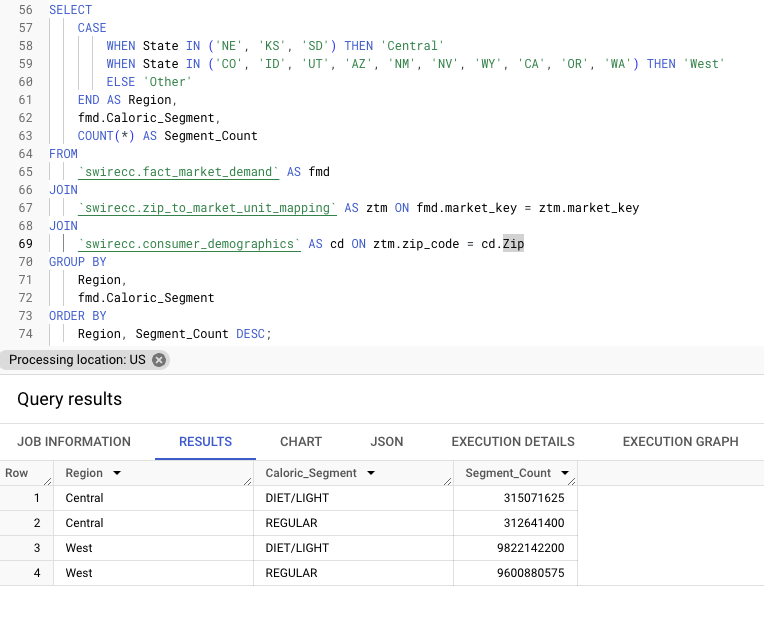

Here we used **SQL to sumarize** the sales of the **'DIET' and 'REGULAR'** products in different **regions**.

The 'DIET' and 'REGULAR' products sales are almost **similar** in the region whereas the the **sales are higher** for both segments in **West** region when compare to **Central** region.

From this we can say that the overall sales of the products happen very high in the West region when compared to the Central region.

## ***Package Type Data Analysis*** <a name='9'></a>

### Q1. What is the distribution of Package Type over Category? <a name='9.1'></a>

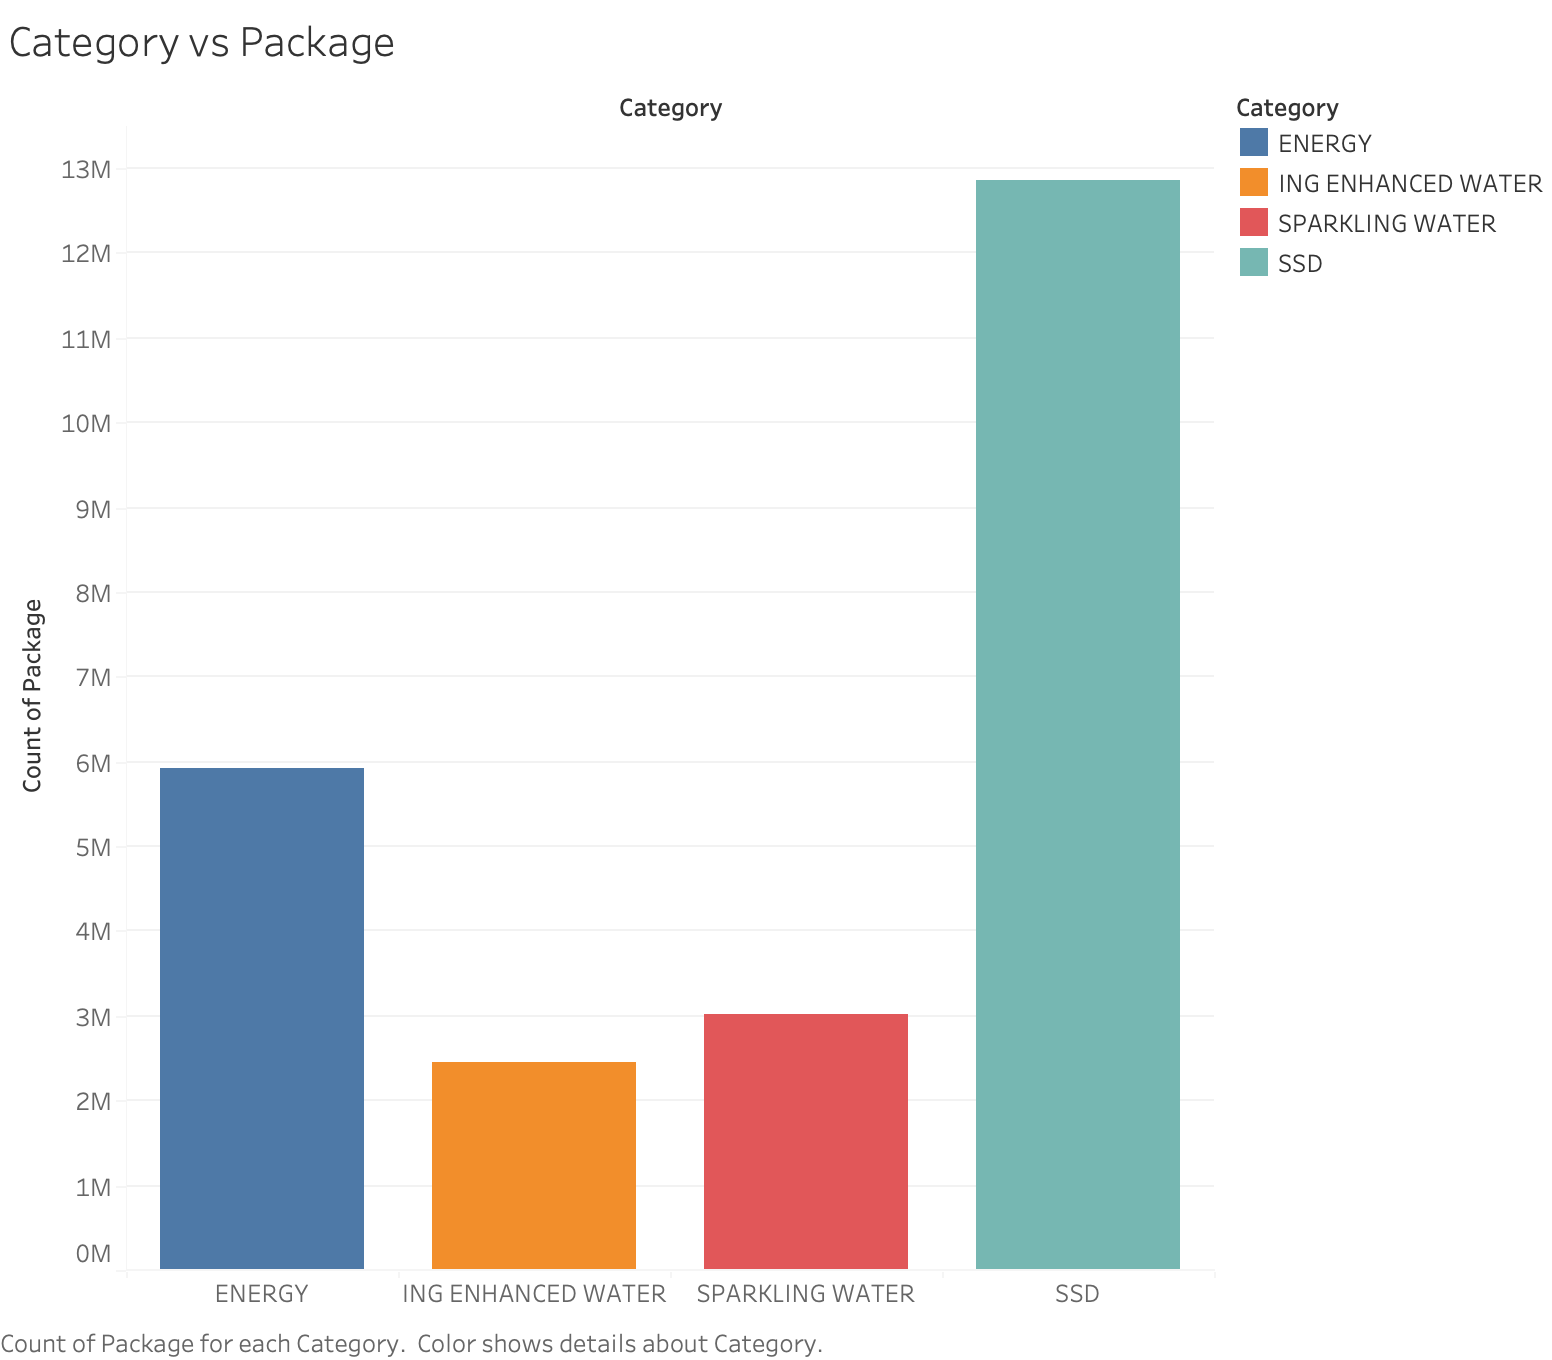

Here, We can see that packets of category type **SSD** has the highest sales with over 13 million and **ENERGY** category with the 6 million sales and packets of category **ING ENHANCED WATER and SPARKLING water** has around 2.5 - 3 million sales.

We have more than 20 different types of packets but we use **only 7** for the problem question analysis. let's visualize weekly unit sales for these 7 packages. They are **.5L Multi Jug, 10Small MLT, .5L 12One Jug, 2L Multi Jug, 11Small 4One, 11Small MLT, 16 Liquid Small**

In [ ]:
# Group by 'PACKET_SIZE' and 'DATE', then calculate sum of 'UNIT_SALES' and 'DOLLAR_SALES'
#.5L Multi Jug
# 10Small MLT
# .5L 12One Jug
# 2L Multi Jug
# 11Small 4One
# 11Small MLT
# 16 Liquid Small
market_demandpacket = market_demand[market_demand['PACKAGE'].isin(['.5L MULTI JUG',
                                                            '10Small MLT',
                                                            '.5L 12ONE JUG',
                                                            '2L MULTI JUG',
                                                            '11SMALL 4ONE',
                                                            '11SMALL MLT',
                                                            '16 LIQUID SMALL'])]
grouped_data = market_demandpacket.groupby(['PACKAGE', 'DATE']).agg({'UNIT_SALES':'sum', 'DOLLAR_SALES':'sum'}).reset_index()

grouped_data.head(10)

,PACKAGE,DATE,UNIT_SALES,DOLLAR_SALES
0,.5L 12ONE JUG,2020-12-05,31096.0,189493.73
1,.5L 12ONE JUG,2020-12-12,34702.0,208506.87
2,.5L 12ONE JUG,2020-12-19,36665.0,217931.78
3,.5L 12ONE JUG,2020-12-26,37157.0,219544.90
4,.5L 12ONE JUG,2021-01-02,41999.0,248498.32
5,.5L 12ONE JUG,2021-01-09,41752.0,250142.88
6,.5L 12ONE JUG,2021-01-16,41503.0,250047.56
7,.5L 12ONE JUG,2021-01-23,46458.0,279251.01
8,.5L 12ONE JUG,2021-01-30,46610.0,281192.44
9,.5L 12ONE JUG,2021-02-06,48973.0,295986.68


### Q2. What are the Unit Sales over Time? <a name='9.2'></a>

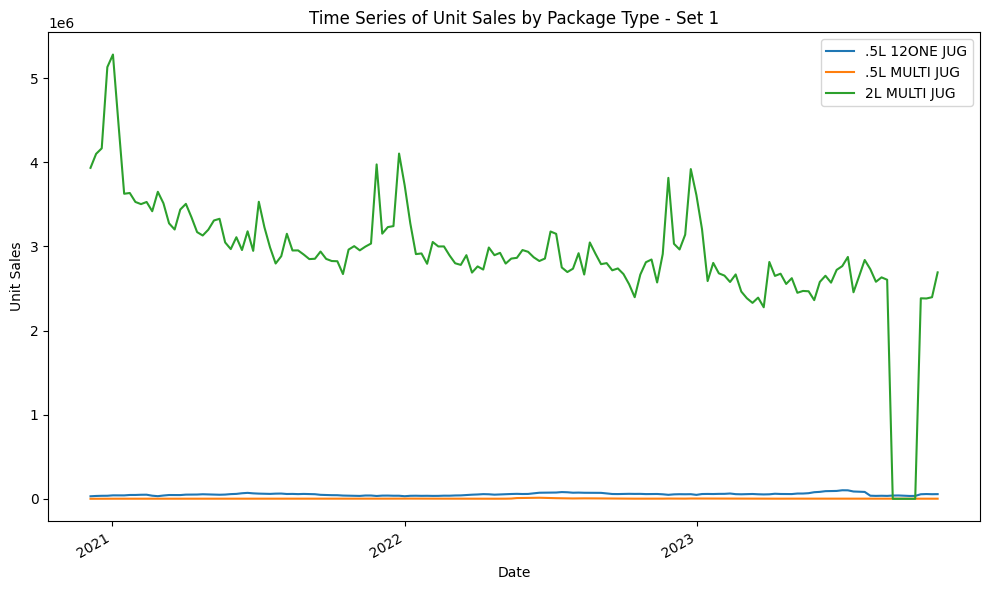

In [ ]:

# Assuming grouped_data is already defined and 'DATE' is converted to datetime
grouped_data['DATE'] = pd.to_datetime(grouped_data['DATE'])

# Get unique package types and divide them into chunks of 5
package_types = grouped_data['PACKAGE'].unique()
chunks = [package_types[x:x+5] for x in range(0, len(package_types), 5)]

# Iterate over each chunk and create a separate plot for each
for i, chunk in enumerate(chunks, start=1):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    for package in chunk:
        subset = grouped_data[grouped_data['PACKAGE'] == package]
        plt.plot(subset['DATE'], subset['UNIT_SALES'], label=package)

    # Set title and labels with chunk number
    plt.title(f'Time Series of Unit Sales by Package Type - Set {i}')
    plt.xlabel('Date')
    plt.ylabel('Unit Sales')

    # Date formatting
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    plt.gcf().autofmt_xdate()  # Improve date readability

    plt.legend()
    plt.tight_layout()
    plt.show()

For the whole 7 package types we have only **3 package types** that are provided in the dataset. So we have to use other methods to solve for the missing packages in the final modeling problems.

For the package 2L MULTI JUG it follows SWIRE-CC sales pattern over time with peaks in November and December. Whereas the remaining two packages has negligible to very low sales.

## ***Flavor Analysis*** <a name='10'></a>

### Q1. How to know the frequency of each word in different flavored type? <a name='10.1'></a>

In [ ]:
# Installing required libraries
!pip install wordcloud matplotlib numpy pandas

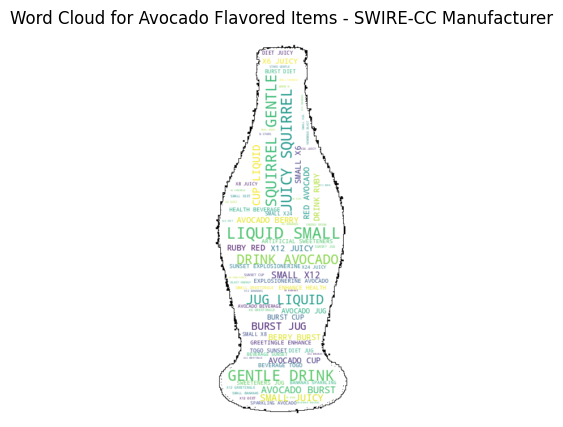

In [ ]:
from wordcloud import WordCloud
from PIL import Image

mask_image = np.array(Image.open('/content/ResizedImage936680-coca-cola-bottle-prototype.png'))

# Filtering for 'avocado' flavored items from SWIRE-CC
df_avocado = market_demand[(market_demand['MANUFACTURER'] == 'SWIRE-CC') &
                            (market_demand['ITEM'].str.contains('avocado', case=False, na=False))]

# Generating word cloud for 'avocado'
text = ' '.join(df_avocado['ITEM'].astype(str))
wordcloud_avocado = WordCloud(width=800, height=400, background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_avocado, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Avocado Flavored Items - SWIRE-CC Manufacturer')
plt.show()

The word cloud for 'Avocado' flavored items from SWIRE-CC emphasizes the diverse appeal of their offerings, with **GENUINE** and **BERRY BURST** suggesting that a focus on authenticity and a rich flavor profile.

The prominence of **LIQUID SMALL** could indicate that these flavors are available in smaller, more convenient packaging, potentially targeting on-the-go consumers or those interested in portion control.

The combination of **AVOCADO BERRY** repeatedly appearing in the cloud points to a signature flavor that may be a distinctive product in the SWIRE-CC lineup, possibly catering to a market niche seeking novel taste experiences. This suggests us that SWIRE-CC is leveraging both flavor innovation and packaging variety to meet diverse consumer tastes and preferences.

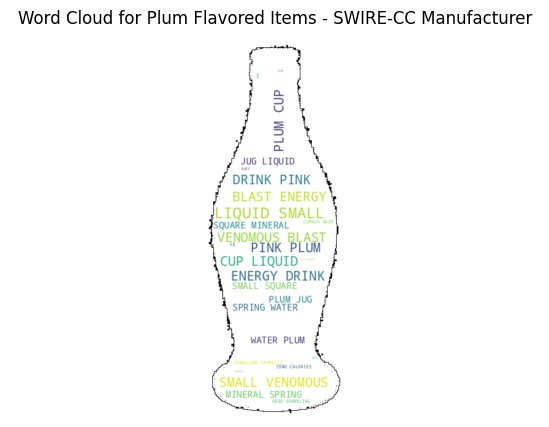

In [ ]:
#mask_image = np.array(Image.open('/content/ResizedImage936680-coca-cola-bottle-prototype.png'))

# Filtering for 'plum' flavored items from SWIRE-CC
df_plum = market_demand[(market_demand['MANUFACTURER'] == 'SWIRE-CC') &
                         (market_demand['ITEM'].str.contains('plum', case=False, na=False))]

# Generating word cloud for 'plum'
text = ' '.join(df_plum['ITEM'].astype(str))
wordcloud_plum = WordCloud(width=800, height=400, background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_plum, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Plum Flavored Items - SWIRE-CC Manufacturer')
plt.show()

In the word cloud for the 'Plum' flavored items, the words **Plum**, **Cup**, **Water**, and **Energy** stand out, which points to a diverse product range including plum-flavored water and energy drinks. The repetition of **Liquid**, **Small**, and **Drink** across both word clouds suggesting us that these are common descriptors in the product lineup for SWIRE-CC, emphasizing the form factor and consumption style of the products.

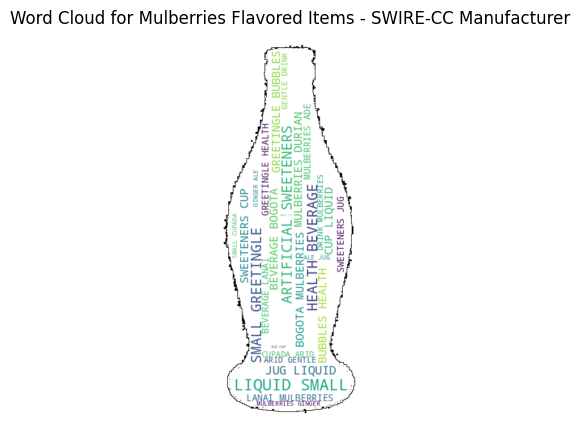

In [ ]:
#mask_image = np.array(Image.open('/content/ResizedImage936680-coca-cola-bottle-prototype.png'))

# Filtering for 'mulberries' flavored items from SWIRE-CC
df_mulberries = market_demand[(market_demand['MANUFACTURER'] == 'SWIRE-CC') &
                               (market_demand['ITEM'].str.contains('mulberries', case=False, na=False))]

# Generating word cloud for 'mulberries'
text = ' '.join(df_mulberries['ITEM'].astype(str))
wordcloud_mulberries = WordCloud(width=800, height=400, background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_mulberries, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Mulberries Flavored Items - SWIRE-CC Manufacturer')
plt.show()

The word cloud for 'Mulberries' flavored items from SWIRE-CC Manufacturer highlights the prominence of certain terms related to their products. The most prominent words, such as **health**, **beverage**, **liquid small**, and **artificial sweeteners** suggest a focus on health-conscious marketing and possibly a smaller package size.

The inclusion of **bubbles** and **green tea** might indicate these are key features or ingredients in the product range. The repetition of words like **mulberries** and **durian** emphasize the flavor profiles that SWIRE-CC is likely promoting.

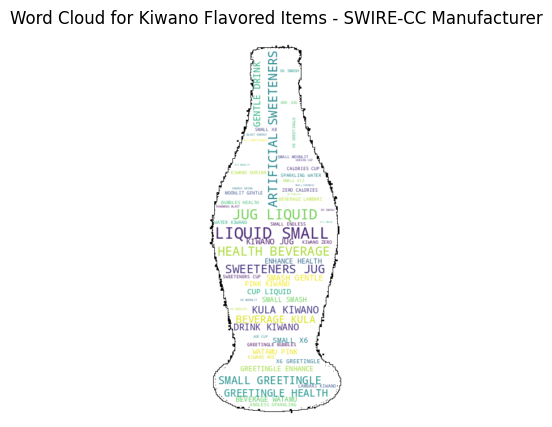

In [ ]:
#mask_image = np.array(Image.open('/content/ResizedImage936680-coca-cola-bottle-prototype.png'))

# Filtering for 'kiwano' flavored items from SWIRE-CC
df_kiwano = market_demand[(market_demand['MANUFACTURER'] == 'SWIRE-CC') &
                           (market_demand['ITEM'].str.contains('kiwano', case=False, na=False))]

# Generate word cloud for 'kiwano'
text = ' '.join(df_kiwano['ITEM'].astype(str))
wordcloud_kiwano = WordCloud(width=800, height=400, background_color='white', mask=mask_image, contour_width=1, contour_color='black').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_kiwano, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Kiwano Flavored Items - SWIRE-CC Manufacturer')
plt.show()


The word cloud for 'Kiwano' flavored items from SWIRE-CC Manufacturer reveals a prominent display of phrases like **Health Beverage**, **Liquid Small**, and **Gentle Drink**, suggests that these terms are frequently used in product marketing. The word **Small** appears to be a common descriptor, potentially indicating a focus on compact or individual-sized beverage options. The repeated appearance of **Jug** and **Kula Kiwano** might refer to specific product lines or packaging styles that are popular within 'Kiwano' flavor category. The use of the word **Artificial Sweeteners** could imply a selling point for these flavors.

### Q2. Calculate month over month sales of each flavored type? <a name='10.2'></a>

<ipython-input-19-4113155a501b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mulberries['DATE'] = pd.to_datetime(df_mulberries['DATE'])
<ipython-input-19-4113155a501b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plum['DATE'] = pd.to_datetime(df_plum['DATE'])


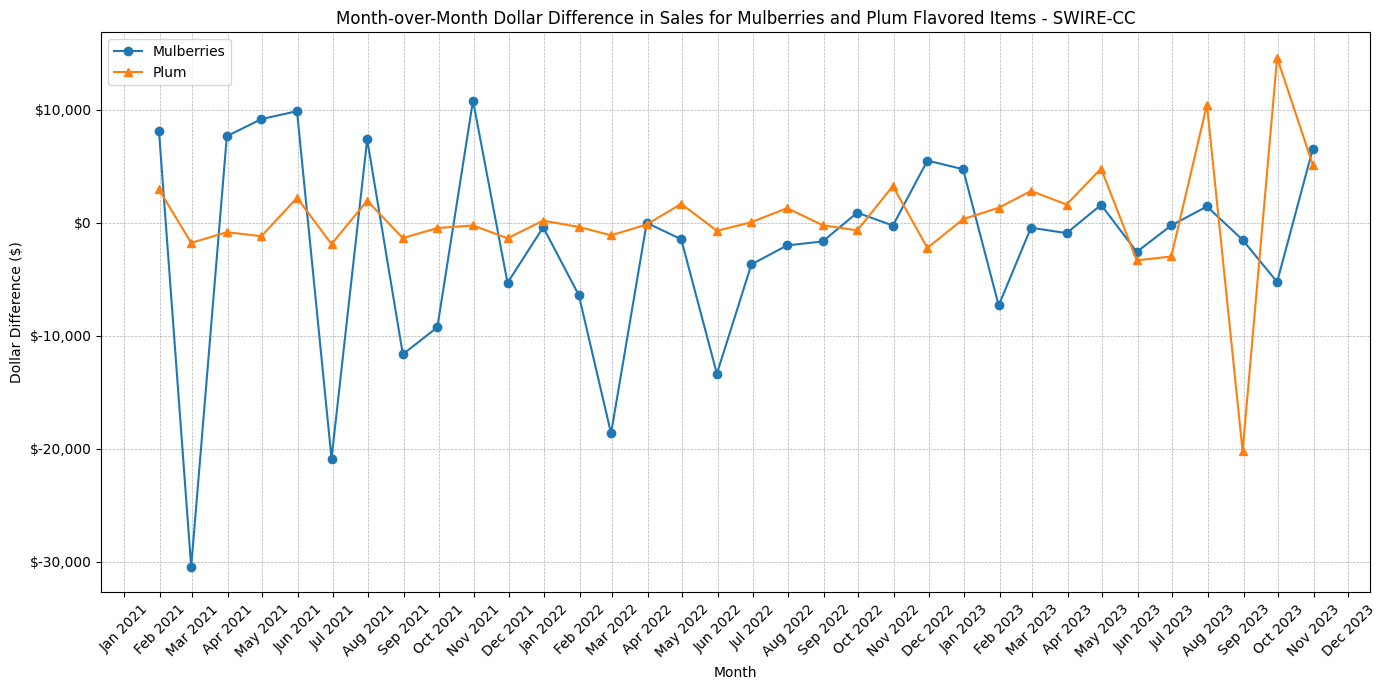

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd

# Ensuring 'DATE' column in 'df_mulberries' and 'df_plum' is in datetime format
df_mulberries['DATE'] = pd.to_datetime(df_mulberries['DATE'])
df_plum['DATE'] = pd.to_datetime(df_plum['DATE'])

# Setting 'DATE' as the index for both DataFrames
df_mulberries.set_index('DATE', inplace=True)
df_plum.set_index('DATE', inplace=True)

# Resampling and summing 'DOLLAR_SALES' to get total monthly sales in dollars
monthly_sales_dollars_mulberries = df_mulberries['DOLLAR_SALES'].resample('M').sum()
monthly_sales_dollars_plum = df_plum['DOLLAR_SALES'].resample('M').sum()

# Calculating Month-over-Month difference in dollars
mom_difference_dollars_mulberries = monthly_sales_dollars_mulberries.diff()
mom_difference_dollars_plum = monthly_sales_dollars_plum.diff()

# Plotting the Month-over-Month dollar difference
plt.figure(figsize=(14, 7))
plt.plot(mom_difference_dollars_mulberries.index, mom_difference_dollars_mulberries.values, marker='o', linestyle='-', label='Mulberries')
plt.plot(mom_difference_dollars_plum.index, mom_difference_dollars_plum.values, marker='^', linestyle='-', label='Plum')

# Setting title, labels, and legend
plt.title('Month-over-Month Dollar Difference in Sales for Mulberries and Plum Flavored Items - SWIRE-CC')
plt.xlabel('Month')
plt.ylabel('Dollar Difference ($)')

# Formatting the x-axis to show month names and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Formatting y-axis tick labels to show dollar values
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Addding grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

The analysis showed a volatile market response. The 'Mulberries' flavor experienced **significant fluctuation**, with a notable low in March 2021, stating a potential seasonal dip. However, it managed to recover and maintain a generally positive trend, reaching a substantial peak in August 2023. In contrast, 'Plum' flavor showed a **more stable pattern** but still had its share of ups and downs. The sharp decrease in June 2023 for Mulberries and subsequent recovery could indicate a temporary market disruption or a successful marketing push.

Plum's consistent performance, except for the September 2023 drop, suggesting us that a loyal consumer base with predictable purchasing behavior, possibly affected by a short-term negative event.

<ipython-input-20-0459aa881ac7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_avocado['DATE'] = pd.to_datetime(df_avocado['DATE'])
<ipython-input-20-0459aa881ac7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kiwano['DATE'] = pd.to_datetime(df_kiwano['DATE'])


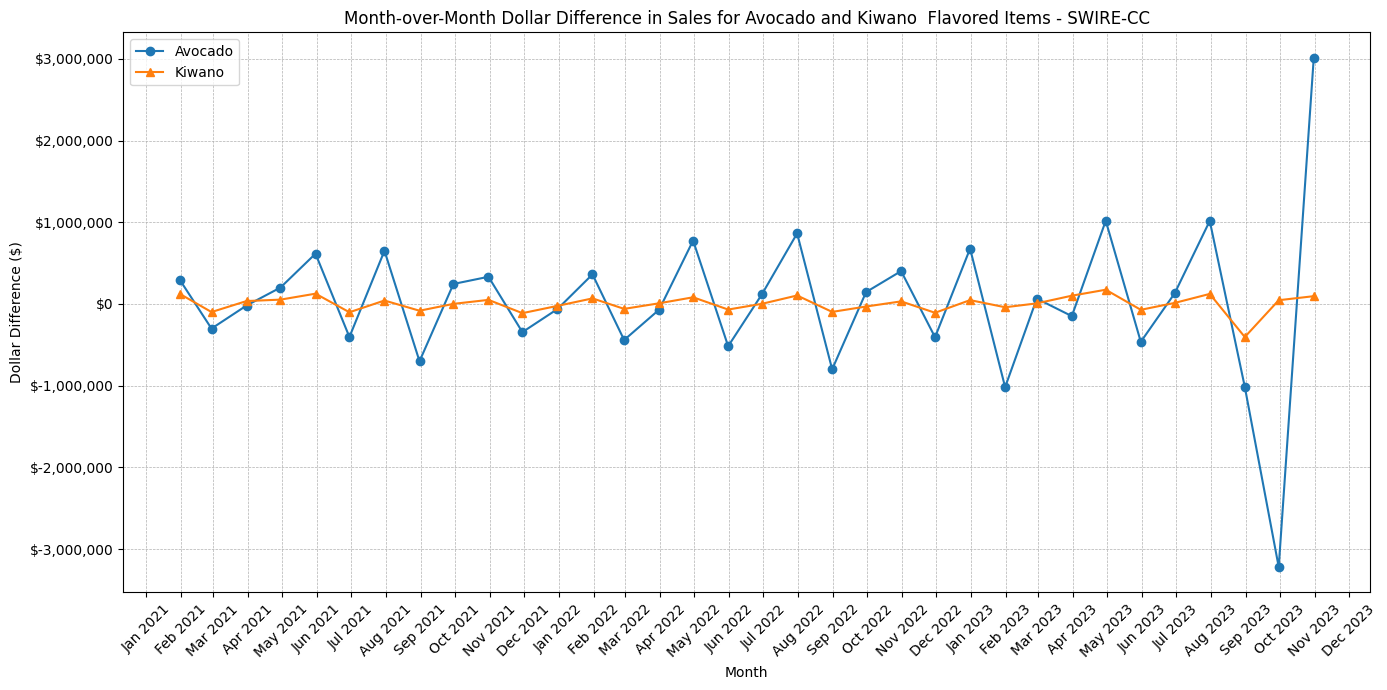

In [ ]:
# Ensuring 'DATE' column in 'df_mulberries' and 'df_plum' is in datetime format
df_avocado['DATE'] = pd.to_datetime(df_avocado['DATE'])
df_kiwano['DATE'] = pd.to_datetime(df_kiwano['DATE'])

# Setting 'DATE' as the index for both DataFrames
df_avocado.set_index('DATE', inplace=True)
df_kiwano.set_index('DATE', inplace=True)

# Resampling and summing 'DOLLAR_SALES' to get total monthly sales in dollars
monthly_sales_dollars_avocado = df_avocado['DOLLAR_SALES'].resample('M').sum()
monthly_sales_dollars_kiwano = df_kiwano['DOLLAR_SALES'].resample('M').sum()

# Calculating Month-over-Month difference in dollars
mom_difference_dollars_avocado = monthly_sales_dollars_avocado.diff()
mom_difference_dollars_kiwano = monthly_sales_dollars_kiwano.diff()

# Plotting the Month-over-Month dollar difference
plt.figure(figsize=(14, 7))
plt.plot(mom_difference_dollars_avocado.index, mom_difference_dollars_avocado.values, marker='o', linestyle='-', label='Avocado')
plt.plot(mom_difference_dollars_kiwano.index, mom_difference_dollars_kiwano.values, marker='^', linestyle='-', label='Kiwano')

# Setting title, labels, and legend
plt.title('Month-over-Month Dollar Difference in Sales for Avocado and Kiwano  Flavored Items - SWIRE-CC')
plt.xlabel('Month')
plt.ylabel('Dollar Difference ($)')

# Formatting the x-axis to show month names and year
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Formatting y-axis tick labels to show dollar values
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))

# Addding grid and legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

The time-series graph indicates a comparison of month-over-month dollar difference in sales for 'Avocado' and 'Kiwano' flavored items from SWIRE-CC across various months. 'Kiwano' showed a **steady pattern** with minor fluctuations around the zero dollar difference line, suggesting us that consistent sales with no dramatic increases or decreases in most months. 'Avacado', however, exhibits more variability, including a significant spike in the final month shown.

### Q3. What is the distribution of flavor types with different age groups? <a name='10.3'></a>

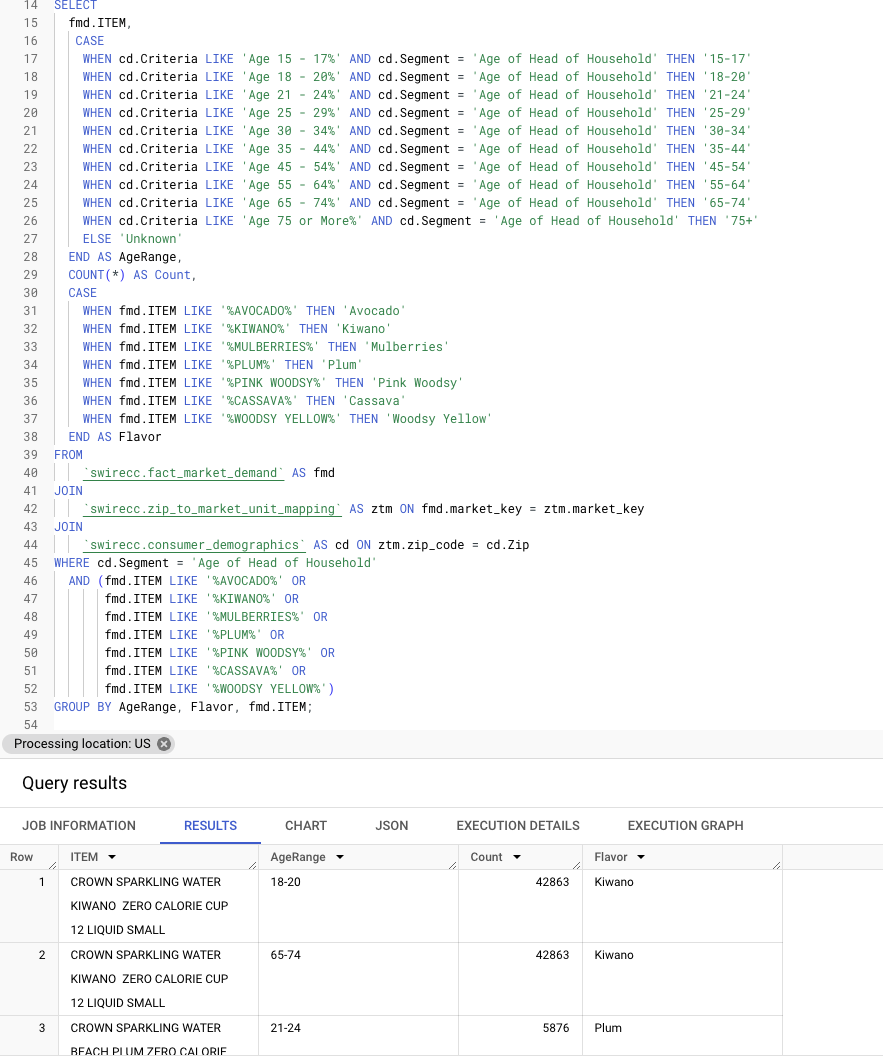

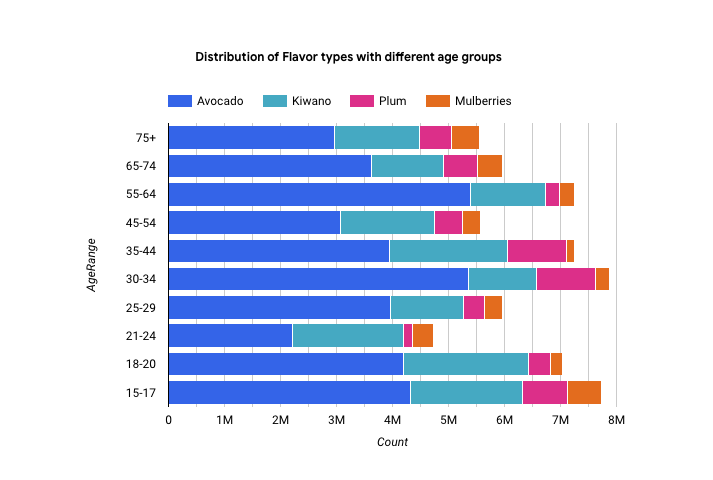

From this plot we used **SQL to analyze** the flavour types in different age groups and plot the results using the **TABLEAU**.

From the visualization we can see that the **Avacado has more overall sales** compared to other flavours.

**Avacado** has age group of 15-20 and 30-34 and 55-64 age group people interested on Avacado flavour.

**Kiwano** followed the Avacado in overall sales and each age group has equal contribution to the sales.

**Mulberries** and **Plum** has very low sales and mostly **young people** of age 15-17 and **old people** of age 65+ buy **Mulberries** flavour, whereas **mid-age** group of age 30-44 people buy **Plum**.

## ***Results*** <a name='11'></a>



*   MYTHICAL Beverage Energy Drink Unflavoured Cup 16 Liquid Small is the most sold ITEM product in the 2021 and 2022.

*   KOOLI Gentle Drink Cola Jug 20 Liquid Small which sold over 27 million units is the most sold ITEM product in 2023.

*   The correlation coefficient between UNIT SALES and DOLLAR SALES is 0.85.

*   The overall UNIT SALES of the products are constant for 2021 and 2022 but the DOLLAR_SALES revenue increased over time, this shows that the price of the product increased over years due to inflation in 2021 and 2022 but the sales remain constant.

*   COCOS, JOLLYS and SWIRE-CC are top three manufactures according to their sales.

*   Most of the sales of the products from these manufactures happen very largely in West region when compared to Central region.

*   Most of the products have their peak sales during the Thanksgiving and Christmans weeks and SWIRE-CC also follows the same trend.

*   Coffee is the least puchased product category whereas the SSD is the most purchased product category followed by Energy.

*   The nan's in the caloric segment are not null or missing values rather it is a third distinct category that doesn't belong to neither DIET/LIGHT or REGULAR. And these nan category product sales are very low when compared to DIET/LIGHT or REGULAR.

*   The product from SWIRE-CC manufacturer with SPARKLING WATER category and SQUARE brand has started it's sales on Jannuary 2023.

*   Package 2L MULTI JUG is the most sold package in the 7 packages list provided by SWIRE-CC.

*   Avacodos the most flavoured product followed by Kiwano.

*   Kiwano has steady sales over the months and in the age groups whereas the Avacado sales fluctuate over the months and in the age group.

*   Mulberries and Plum has very low sales and mostly young people of age 15-17 and old people of age 65+ buy Mulberries flavour, whereas mid-age group of age 30-44 people buy Plum.

* From the word cloud we can look at that Avacado is gentle,juicy, squirrel small drink as these words are haapen to be with items of Avacado flavour. Whereas the Kiwano has Artificial sweetners and small health beverage.









## ***Team Contribution*** <a name='12'></a>

**Abhiram Mannam** - Examined the sales trends of manufacturers across various combinations including caloric content, brand, and category segments. Analyzed the relationship between unit sales and dollar sales. Implemented a word cloud analysis within the flavor segment. Additionally, developed comprehensive documentation and code annotations along with results and conclusions.

**Sai Eshwar Tadepalli** - Used Google BigQuery to perform complex SQL queries, implemented Google Looker and Tableau for creating insightful visualizations, performed flavor, category, manufacture and caloric segment data analysis, optimized word cloud in the shape of bottle, cross-checked all code annotations, actively participated in team discussions, providing valuable insights and feedback.

**Kushal Ram Tayi** - Imported the dataset into Google Cloud Storage and google colab. Performed comprehensive data exploration and generated correlation matrix heatmap. Analysed market demand and package type trends for unit and dollar sales over time and visulizations, and worked on the documentation.

## ***Conclusion*** <a name='13'></a>

To conclude, Swire Coca-Cola prioritizes optimizing production planning and management, particularly for its innovative product line. Accurate demand forecasting ensures efficient resource allocation and streamlined operations.

Analysis of Swire Coca-Cola's product data from 2020 to 2023 provides crucial insights for strategic planning. We will develop a reliable forecast model to predict demand for the innovative products.

Insights from exploratory data analysis (EDA) are instrumental in forecasting sales for Swire-CC's innovative products. By leveraging EDA findings, robust forecasting models can be developed, accounting for various sales dynamics. This enables Swire-CC to anticipate market demand, optimize inventory, and maximize sales potential for enhanced business performance.

